In [1]:
from scipy import stats

from numpy import log

import pmdarima as pm
from pmdarima.arima.utils import ndiffs

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = str(datetime.now().year)+'-'+str(datetime.now().month)+'-'+str(datetime.now().day)
data

'2020-6-7'

In [8]:
os.chdir('E:\\OneDrive\\Programação\\python\\covid\\data\\results')
directory = os.listdir('..')
printLis(directory)

-------------
-=< Lista >=-
-------------
0 -> 05-caso_full_2020-06-05.csv
1 -> Dados_demográficos_municípios_new.xlsx
2 -> idade.xlsx
3 -> results


In [9]:
# 05-caso_full_2020-06-05.csv
date = 0
df_cov =  pd.read_csv('..\\'+directory[date])
df_cov.tail()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
167511,NaN,43.0,2020-06-05,23,11377239.0,False,True,11010,96.77216,2020-06-04,0.0241,265,88,state,RS,0,0
167512,NaN,42.0,2020-06-05,23,7164788.0,False,True,9660,134.82604,2020-06-02,0.0153,148,86,state,SC,0,0
167513,NaN,28.0,2020-06-05,23,2298696.0,False,True,8200,356.72399,2020-06-04,0.0227,186,84,state,SE,0,0
167514,NaN,35.0,2020-06-05,23,45919049.0,True,False,134565,293.04832,2020-06-05,0.0657,8842,102,state,SP,5365,281
167515,NaN,17.0,2020-06-05,23,1572866.0,False,True,4698,298.69042,2020-06-03,0.0175,82,80,state,TO,0,0


In [6]:
# df_cov = df_cov[
#         (df_cov['date'] == df_cov['date'].tail(1).values[0]) & 
#         (df_cov['place_type'] == 'city') & 
#         (df_cov['last_available_confirmed'] > 1)
# ][[
#     "city",
#     "state",
#     "estimated_population_2019",
#     "last_available_confirmed",
#     "last_available_deaths",
#     "last_available_confirmed_per_100k_inhabitants",
#     "last_available_death_rate",
# ]]
# df_cov = df_cov.rename(columns={
#     "city": "City",
#     "state": "State",
#     "estimated_population_2019": "Population",
#     "last_available_confirmed": "Confirmed",
#     "last_available_deaths": "Deaths",
#     "last_available_confirmed_per_100k_inhabitants": "Confirmed-100k",
#     "last_available_death_rate": "Death Rate",
# })
# df_cov.head()
# df = df_cov
# df.head()

In [7]:
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167516 entries, 0 to 167515
Data columns (total 17 columns):
city                                             165217 non-null object
city_ibge_code                                   166234 non-null float64
date                                             167516 non-null object
epidemiological_week                             167516 non-null int64
estimated_population_2019                        166234 non-null float64
is_last                                          167516 non-null bool
is_repeated                                      167516 non-null bool
last_available_confirmed                         167516 non-null int64
last_available_confirmed_per_100k_inhabitants    161812 non-null float64
last_available_date                              167516 non-null object
last_available_death_rate                        167516 non-null float64
last_available_deaths                            167516 non-null int64
order_for_place             

In [8]:
teste = 'date'
df_cov = df_cov[['last_available_confirmed', 'last_available_deaths', 'last_available_confirmed_per_100k_inhabitants', 'last_available_death_rate', teste]]
df_cov[teste] = pd.to_datetime(df_cov[teste])
group = df_cov.groupby(teste)
df = pd.DataFrame()
df['Confirmed'] = group.sum()['last_available_confirmed']/2
df['Deaths'] = group.sum()['last_available_deaths']/2
df['Confirmed/100k'] = group.sum()['last_available_confirmed_per_100k_inhabitants']/2
df['Death/100k'] = group.sum()['last_available_death_rate']/2
df.index.name = 'Date'
df.head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-02-25,1.0,0.0,0.00517,0.0
2020-02-26,1.0,0.0,0.00517,0.0
2020-02-27,1.0,0.0,0.00517,0.0
2020-02-28,2.0,0.0,0.01034,0.0
2020-02-29,2.0,0.0,0.01034,0.0


In [9]:
df.tail()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-06-01,531054.5,30105.0,353601.765270,109.28280
2020-06-02,562961.5,31473.0,380680.070440,107.79160
2020-06-03,588077.0,32653.0,402621.717955,106.23245
2020-06-04,611651.0,33647.0,424042.742130,103.54145
2020-06-05,617519.0,33931.0,425949.202695,103.44360


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2020-02-25 to 2020-06-05
Data columns (total 4 columns):
Confirmed         102 non-null float64
Deaths            102 non-null float64
Confirmed/100k    102 non-null float64
Death/100k        102 non-null float64
dtypes: float64(4)
memory usage: 4.0 KB


In [11]:
df[df['Confirmed'] >= 100].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-03-14,134.0,0.0,41.104555,0.00000
2020-03-15,153.0,0.0,43.039390,0.00000
2020-03-16,276.0,0.0,46.888555,0.00000
2020-03-17,323.0,1.0,54.310990,0.00625
2020-03-18,509.5,3.0,68.983255,0.01325


In [12]:
df[df['Confirmed'] >= 1000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-03-21,1101.5,15.0,161.589555,0.76290
2020-03-22,1432.0,18.5,179.500525,0.75685
2020-03-23,1748.0,23.5,240.891625,0.76245
2020-03-24,2018.5,31.5,301.893030,1.02365
2020-03-25,2565.5,59.0,385.438370,1.83135


In [13]:
df[df['Confirmed'] >= 10000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-04-04,10361.5,444.0,1839.616505,17.20725
2020-04-05,11422.5,496.0,2102.456695,19.36315
2020-04-06,12261.5,569.5,2443.711145,22.62515
2020-04-07,14082.5,691.0,2970.992270,24.60300
2020-04-08,16255.5,826.0,3364.325070,29.48010


In [14]:
df[df['Confirmed'] >= 100000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-05-03,101816.0,7073.0,35124.271240,96.15070
2020-05-04,108777.0,7381.0,38446.534915,97.45235
2020-05-05,116412.0,7972.0,42866.960620,102.06045
2020-05-06,126628.0,8566.5,47223.593100,101.38340
2020-05-07,136648.0,9270.5,53123.150495,102.50370


In [15]:
df[df['Confirmed'] >= 500000].head()

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-05-30,502378.0,28872.0,327924.801360,110.00890
2020-05-31,516093.0,29367.0,339655.217355,109.39525
2020-06-01,531054.5,30105.0,353601.765270,109.28280
2020-06-02,562961.5,31473.0,380680.070440,107.79160
2020-06-03,588077.0,32653.0,402621.717955,106.23245


In [16]:
df.iloc[:30]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-02-25,1.0,0.0,0.005170,0.00000
2020-02-26,1.0,0.0,0.005170,0.00000
2020-02-27,1.0,0.0,0.005170,0.00000
2020-02-28,2.0,0.0,0.010340,0.00000
2020-02-29,2.0,0.0,0.010340,0.00000
2020-03-01,2.0,0.0,0.010340,0.00000
2020-03-02,2.0,0.0,0.010340,0.00000
2020-03-03,2.0,0.0,0.010340,0.00000
2020-03-04,3.0,0.0,0.015510,0.00000


In [17]:
df.iloc[30:60]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-03-26,2987.5,77.0,454.683035,3.20045
2020-03-27,3476.0,93.0,553.815940,3.40240
2020-03-28,3839.5,106.5,642.123905,3.38230
2020-03-29,4167.0,121.5,705.606235,3.38225
2020-03-30,4660.0,166.0,802.700595,5.60230
2020-03-31,5824.0,202.0,959.051630,6.61675
2020-04-01,6931.0,244.0,1076.303935,9.35805
2020-04-02,8099.0,294.5,1329.154785,7.75485
2020-04-03,9212.0,365.0,1598.650795,12.35780


In [18]:
df.iloc[60:90]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-04-25,59506.0,4074.0,16321.681545,86.29340
2020-04-26,63221.0,4301.0,18230.007525,87.00615
2020-04-27,67366.0,4606.0,19713.314415,87.04330
2020-04-28,73600.0,5092.0,22671.817870,88.84450
2020-04-29,79715.0,5534.0,25064.617395,88.30070
2020-04-30,87126.0,5980.0,28402.413725,88.56205
2020-05-01,92582.0,6438.0,30543.693920,92.57210
2020-05-02,97427.0,6808.0,33128.406260,94.18070
2020-05-03,101816.0,7073.0,35124.271240,96.15070


In [19]:
df.iloc[90:]

,Confirmed,Deaths,Confirmed/100k,Death/100k
Date,,,,
2020-05-25,378836.5,23588.0,236285.548270,117.78980
2020-05-26,395164.5,24639.0,238866.790720,119.44735
2020-05-27,414944.0,25696.0,256177.651785,119.88240
2020-05-28,443700.5,26882.0,279793.504575,118.27805
2020-05-29,470587.5,28018.0,300899.335470,114.30655
2020-05-30,502378.0,28872.0,327924.801360,110.00890
2020-05-31,516093.0,29367.0,339655.217355,109.39525
2020-06-01,531054.5,30105.0,353601.765270,109.28280
2020-06-02,562961.5,31473.0,380680.070440,107.79160


In [20]:
g = 1
campo = 'Confirmed'
print_campo = 'n'
figsize=(30, 5)
first = '2020-' + str(df.tail(1).index.month[0] - 1) + '-' + str(df.tail(1).index.day[0])
last = '2020-' + str(df.tail(1).index.month[0] + 1) + '-' + str(df.tail(1).index.day[0])
start = '2020-' + str(df.head(1).index.month[0]) + '-' + str(df.head(1).index.day[0])
end = '2020-' + str(df.tail(1).index.month[0]) + '-' + str(df.tail(1).index.day[0])
try:
    os.mkdir('ts')
    print('Directory created')
except FileExistsError:
    print('Directory already exists')

Directory already exists


In [21]:
df = pd.DataFrame(df[campo])

df_adf_test = df.diff().diff().diff().dropna()

# df_adf_test = df.transform(lambda x: x ** 2)
# df_adf_test = df_adf_test.diff().diff().diff().dropna()

result = adfuller(df_adf_test)
print(f'ADF: {round(result[0], 2)}%')
print(f'p-value: {round(result[1], 10)}%')

ADF: -4.46%
p-value: 0.0002344109%


In [22]:

# Adf Test
print(ndiffs(df, test='adf'))

# KPSS test
print(ndiffs(df, test='kpss'))

# PP test:
print(ndiffs(df, test='pp'))

2
2
1


In [23]:
fonte = 12
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

C:\Users\gfsil\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


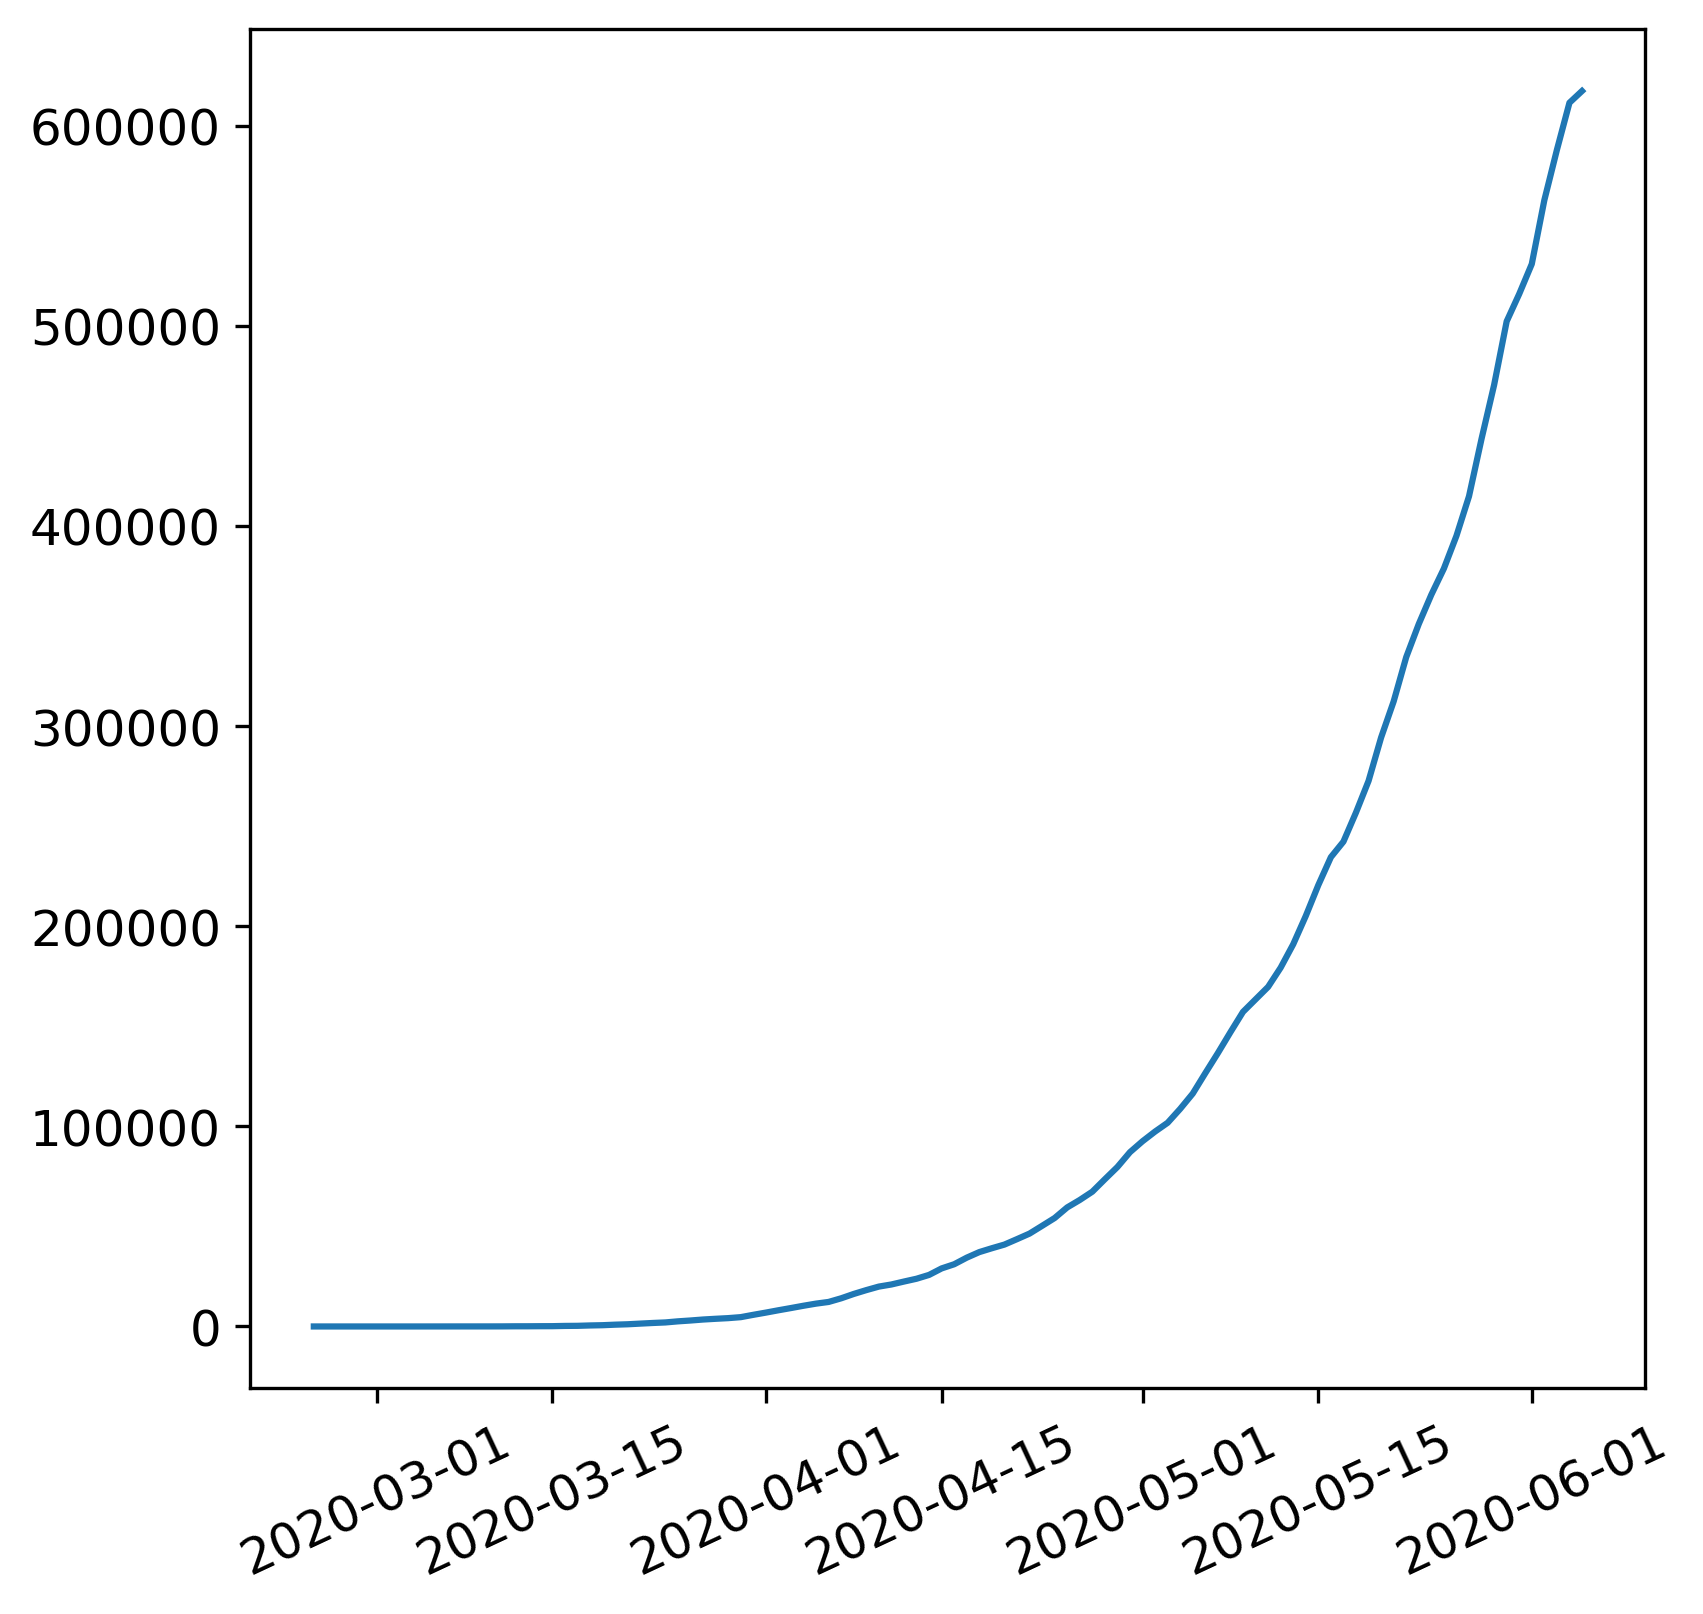

In [24]:
size_fig = (6,6)
plt.figure(figsize=size_fig)
plt.plot(df)
plt.xticks(rotation=25)
# plt.ylabel(campo)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

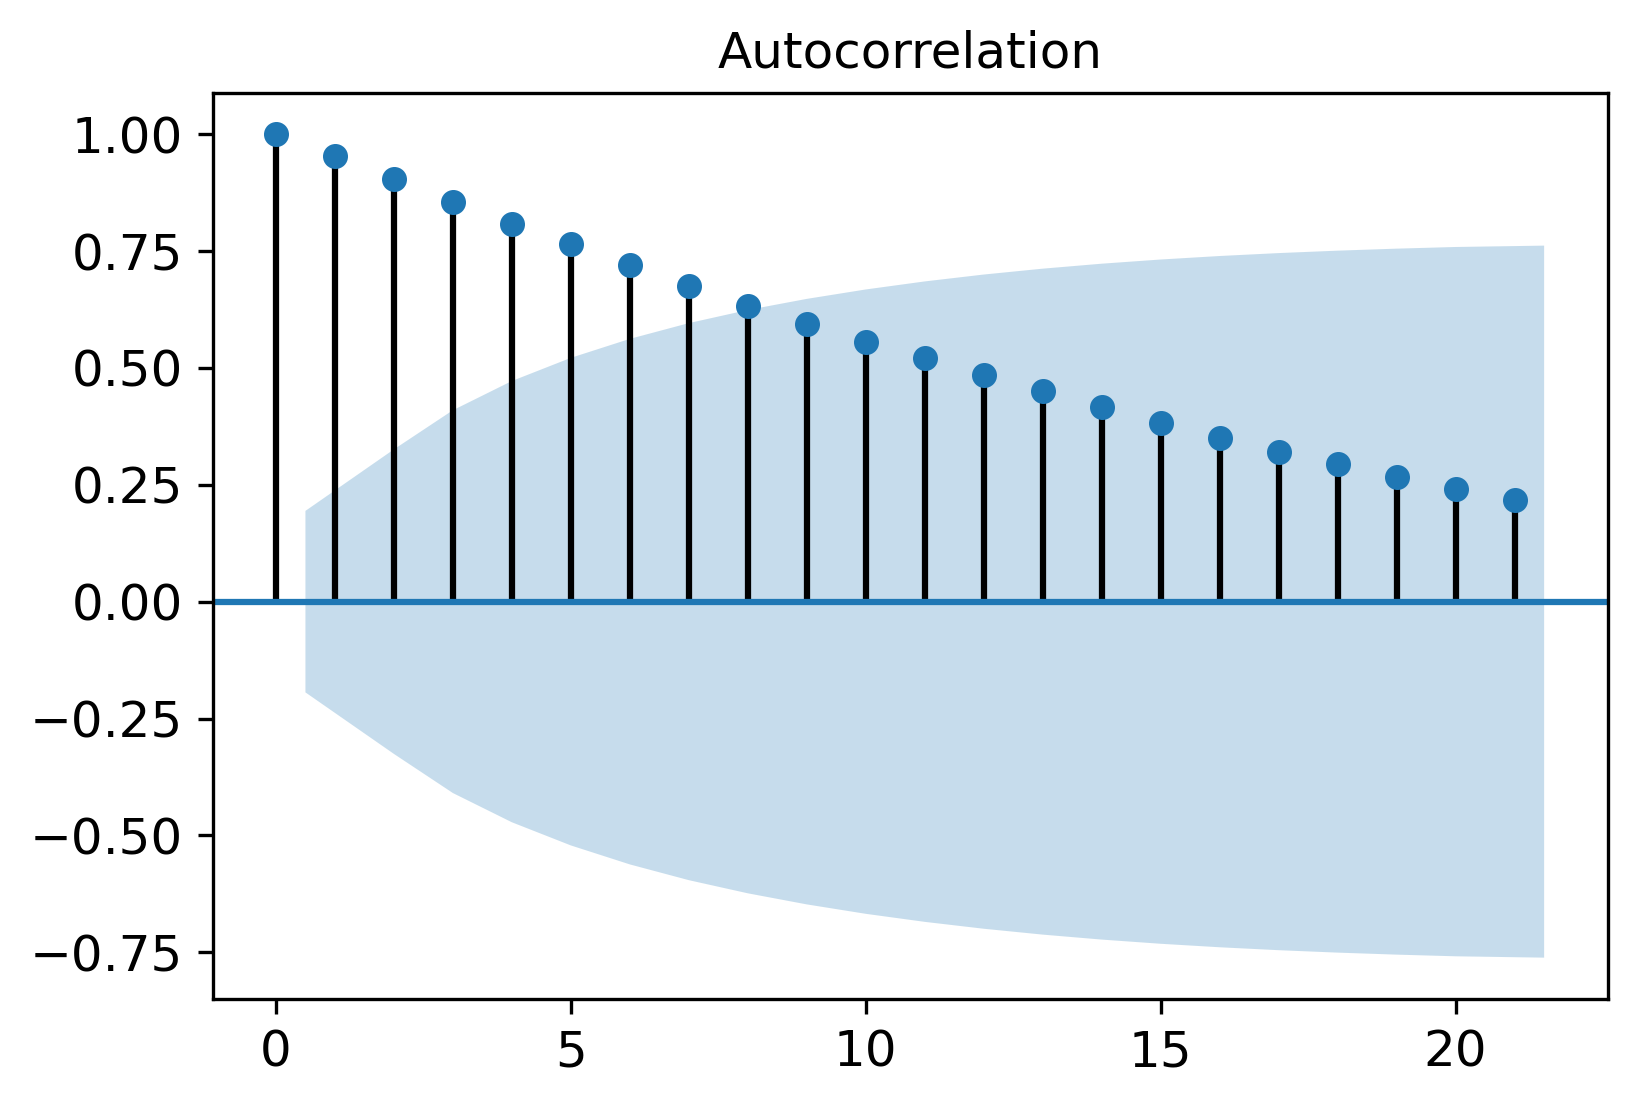

In [25]:
plt.figure(figsize=size_fig)
plot_acf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

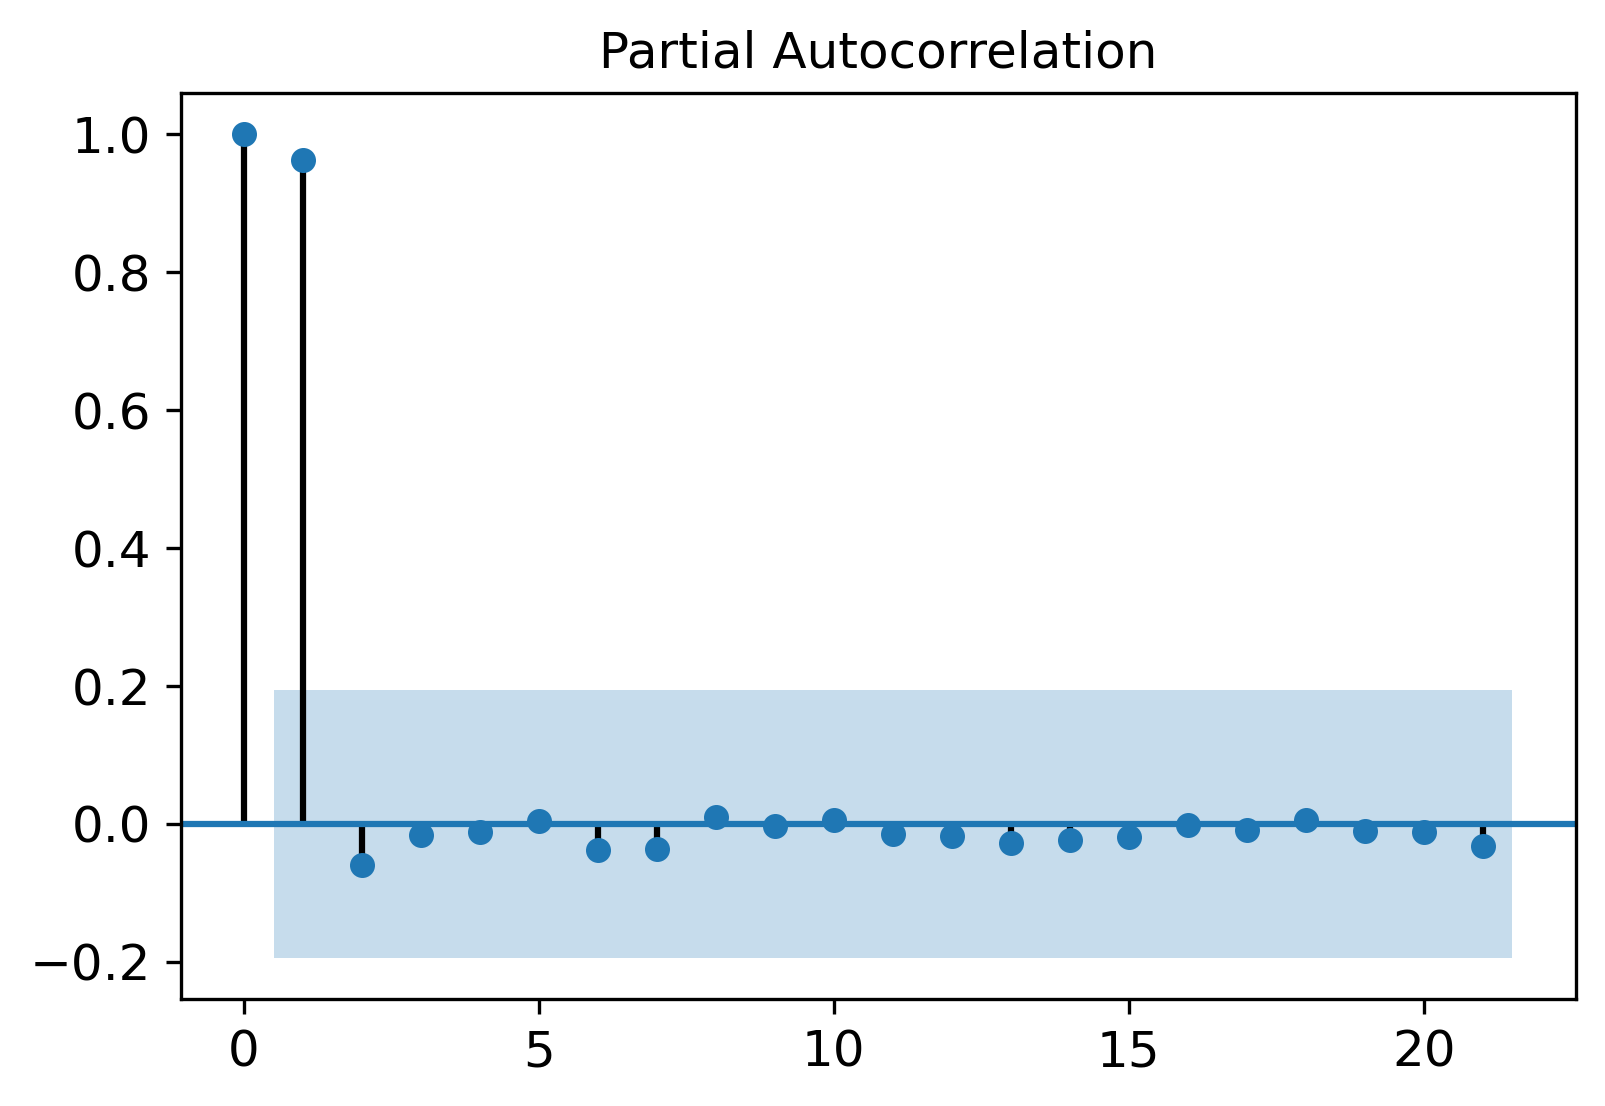

In [26]:
plt.figure(figsize=size_fig)
plot_pacf(df)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

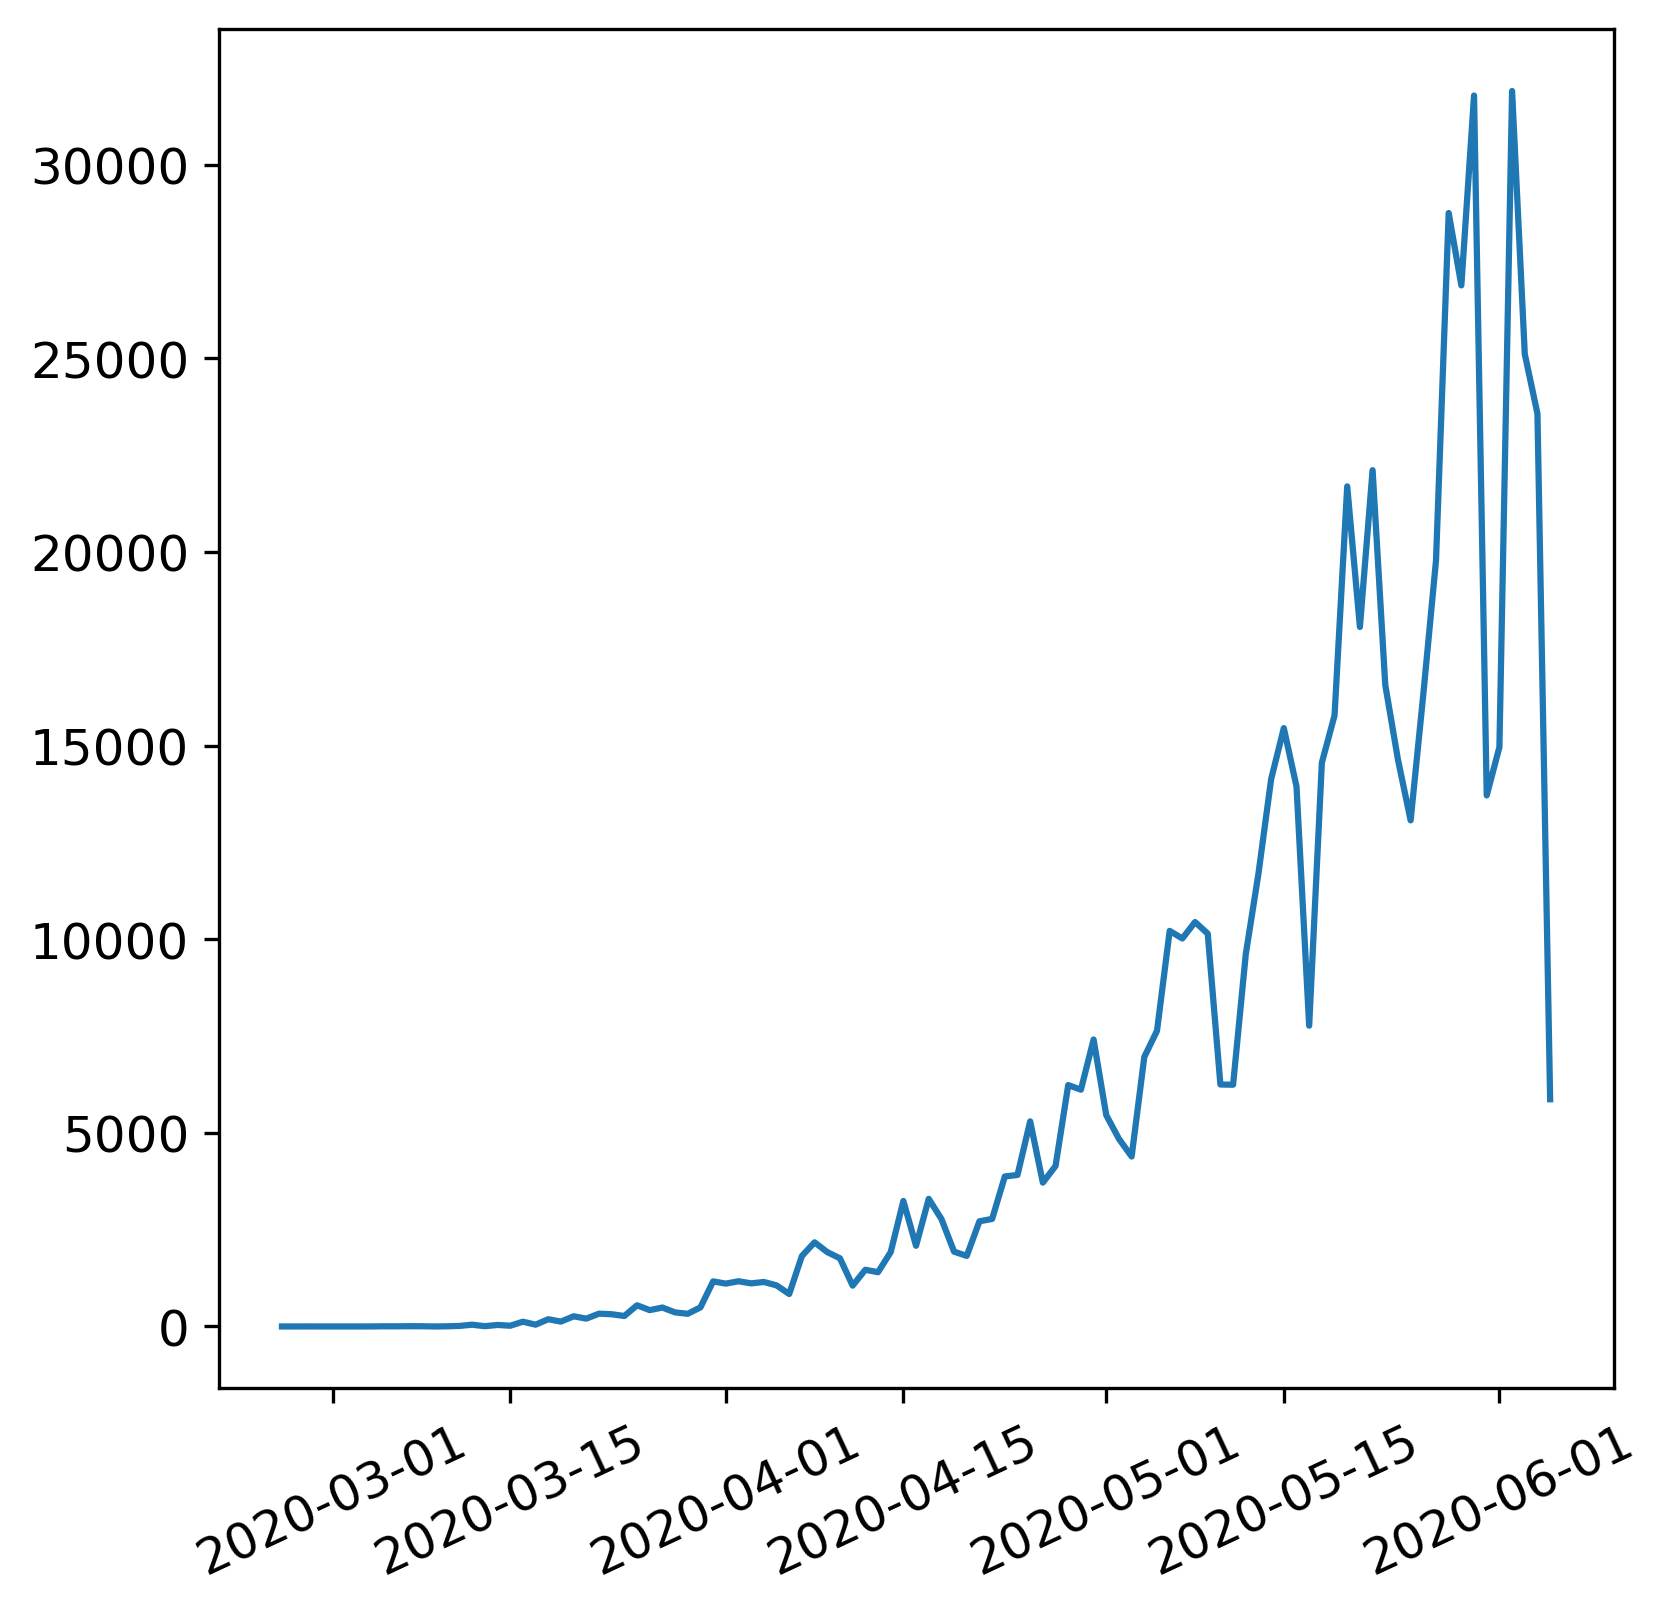

In [27]:
plt.figure(figsize=size_fig)
plt.plot(df.diff().dropna())
plt.xticks(rotation=25)
# plt.ylabel(campo)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

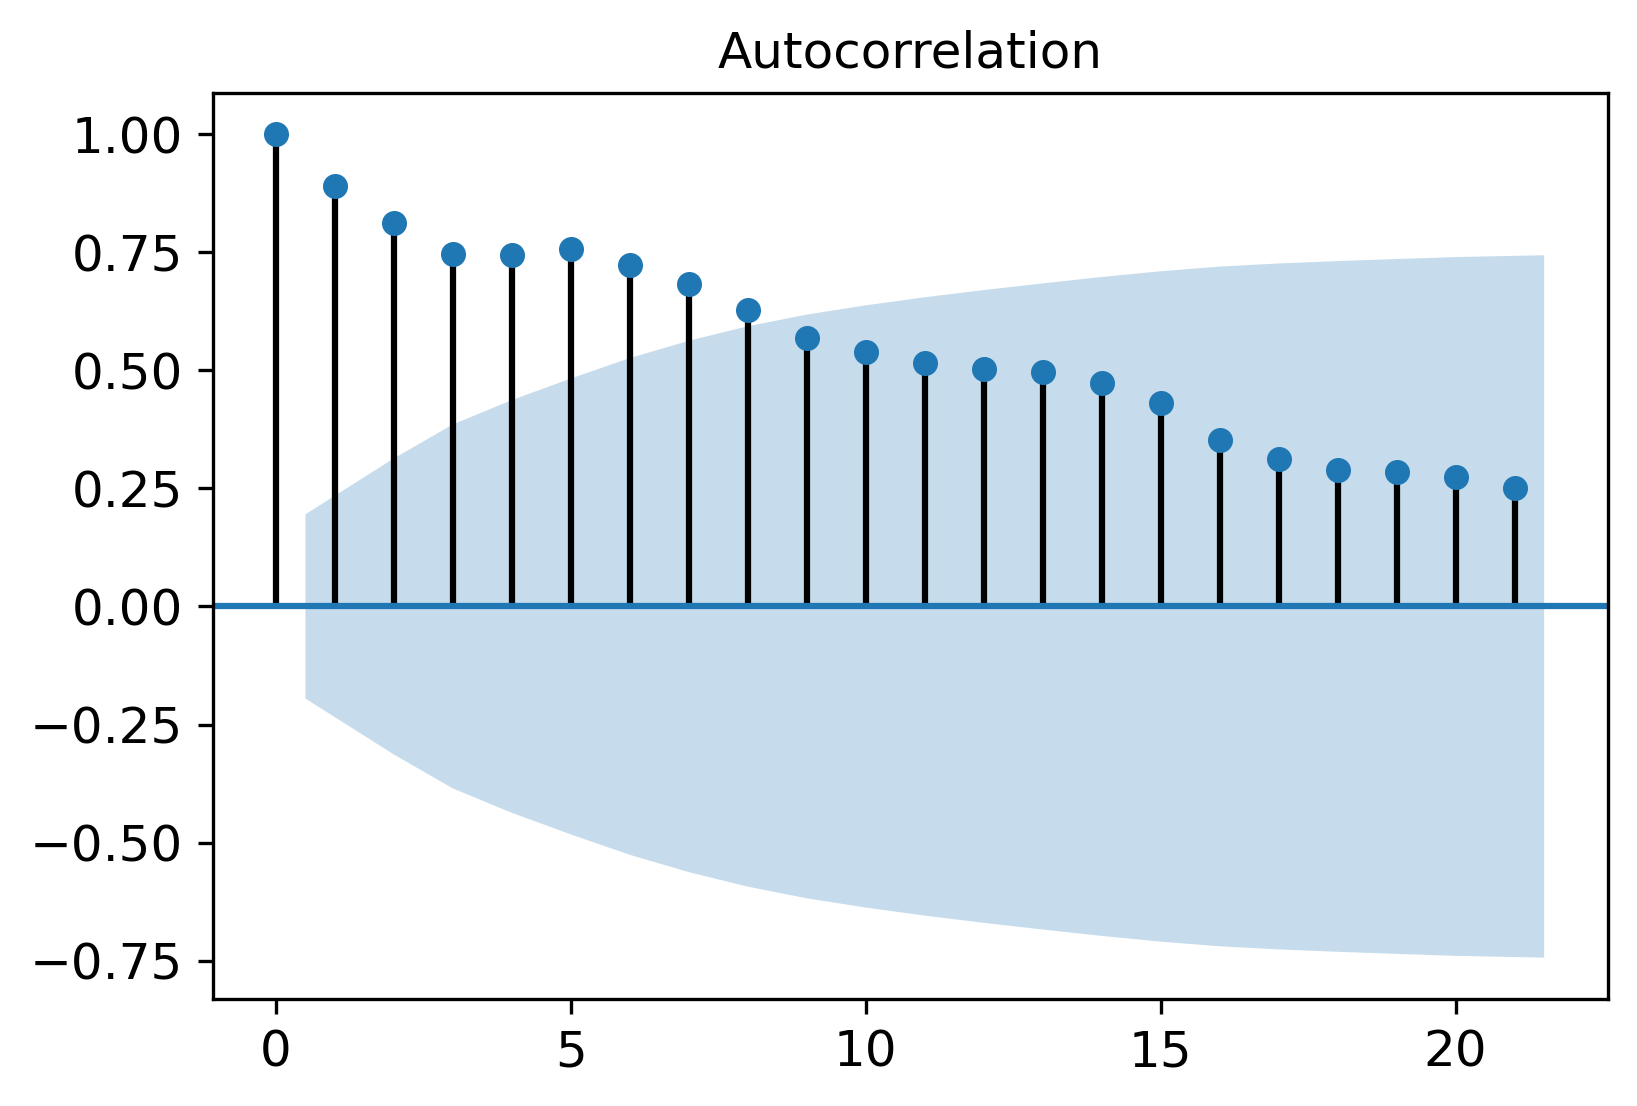

In [28]:
plt.figure(figsize=size_fig)
plot_acf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

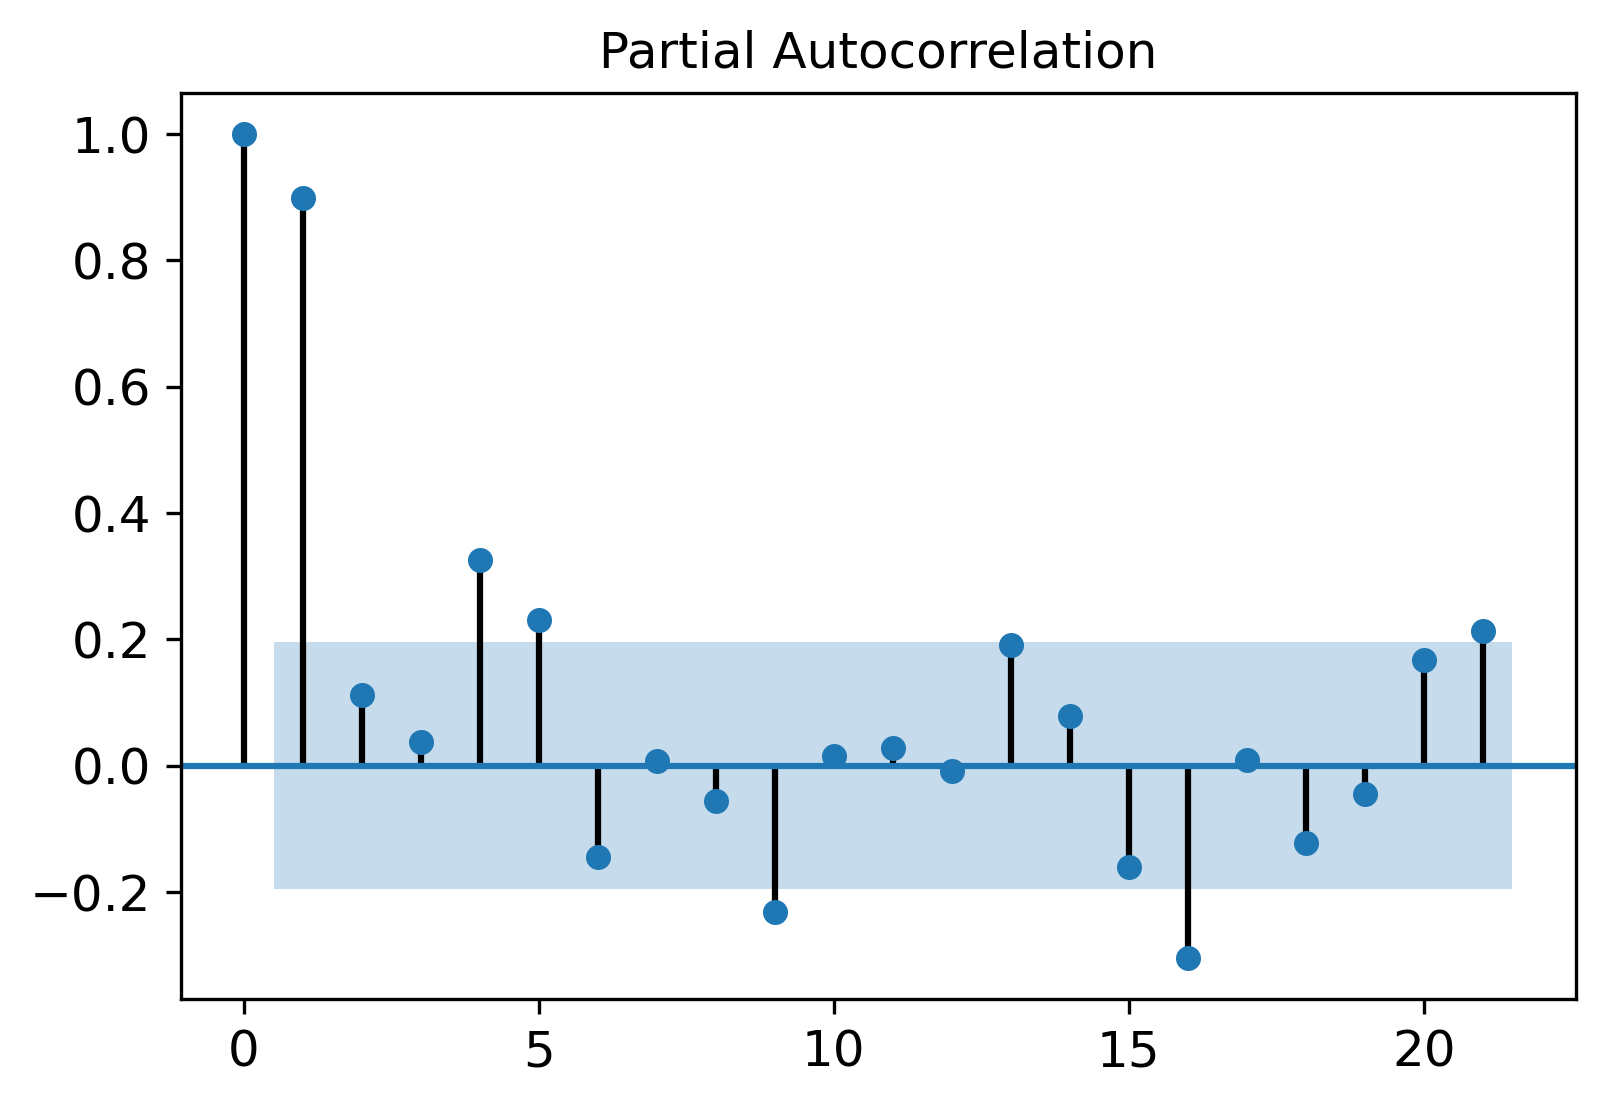

In [29]:
plt.figure(figsize=size_fig)
plot_pacf(df.diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

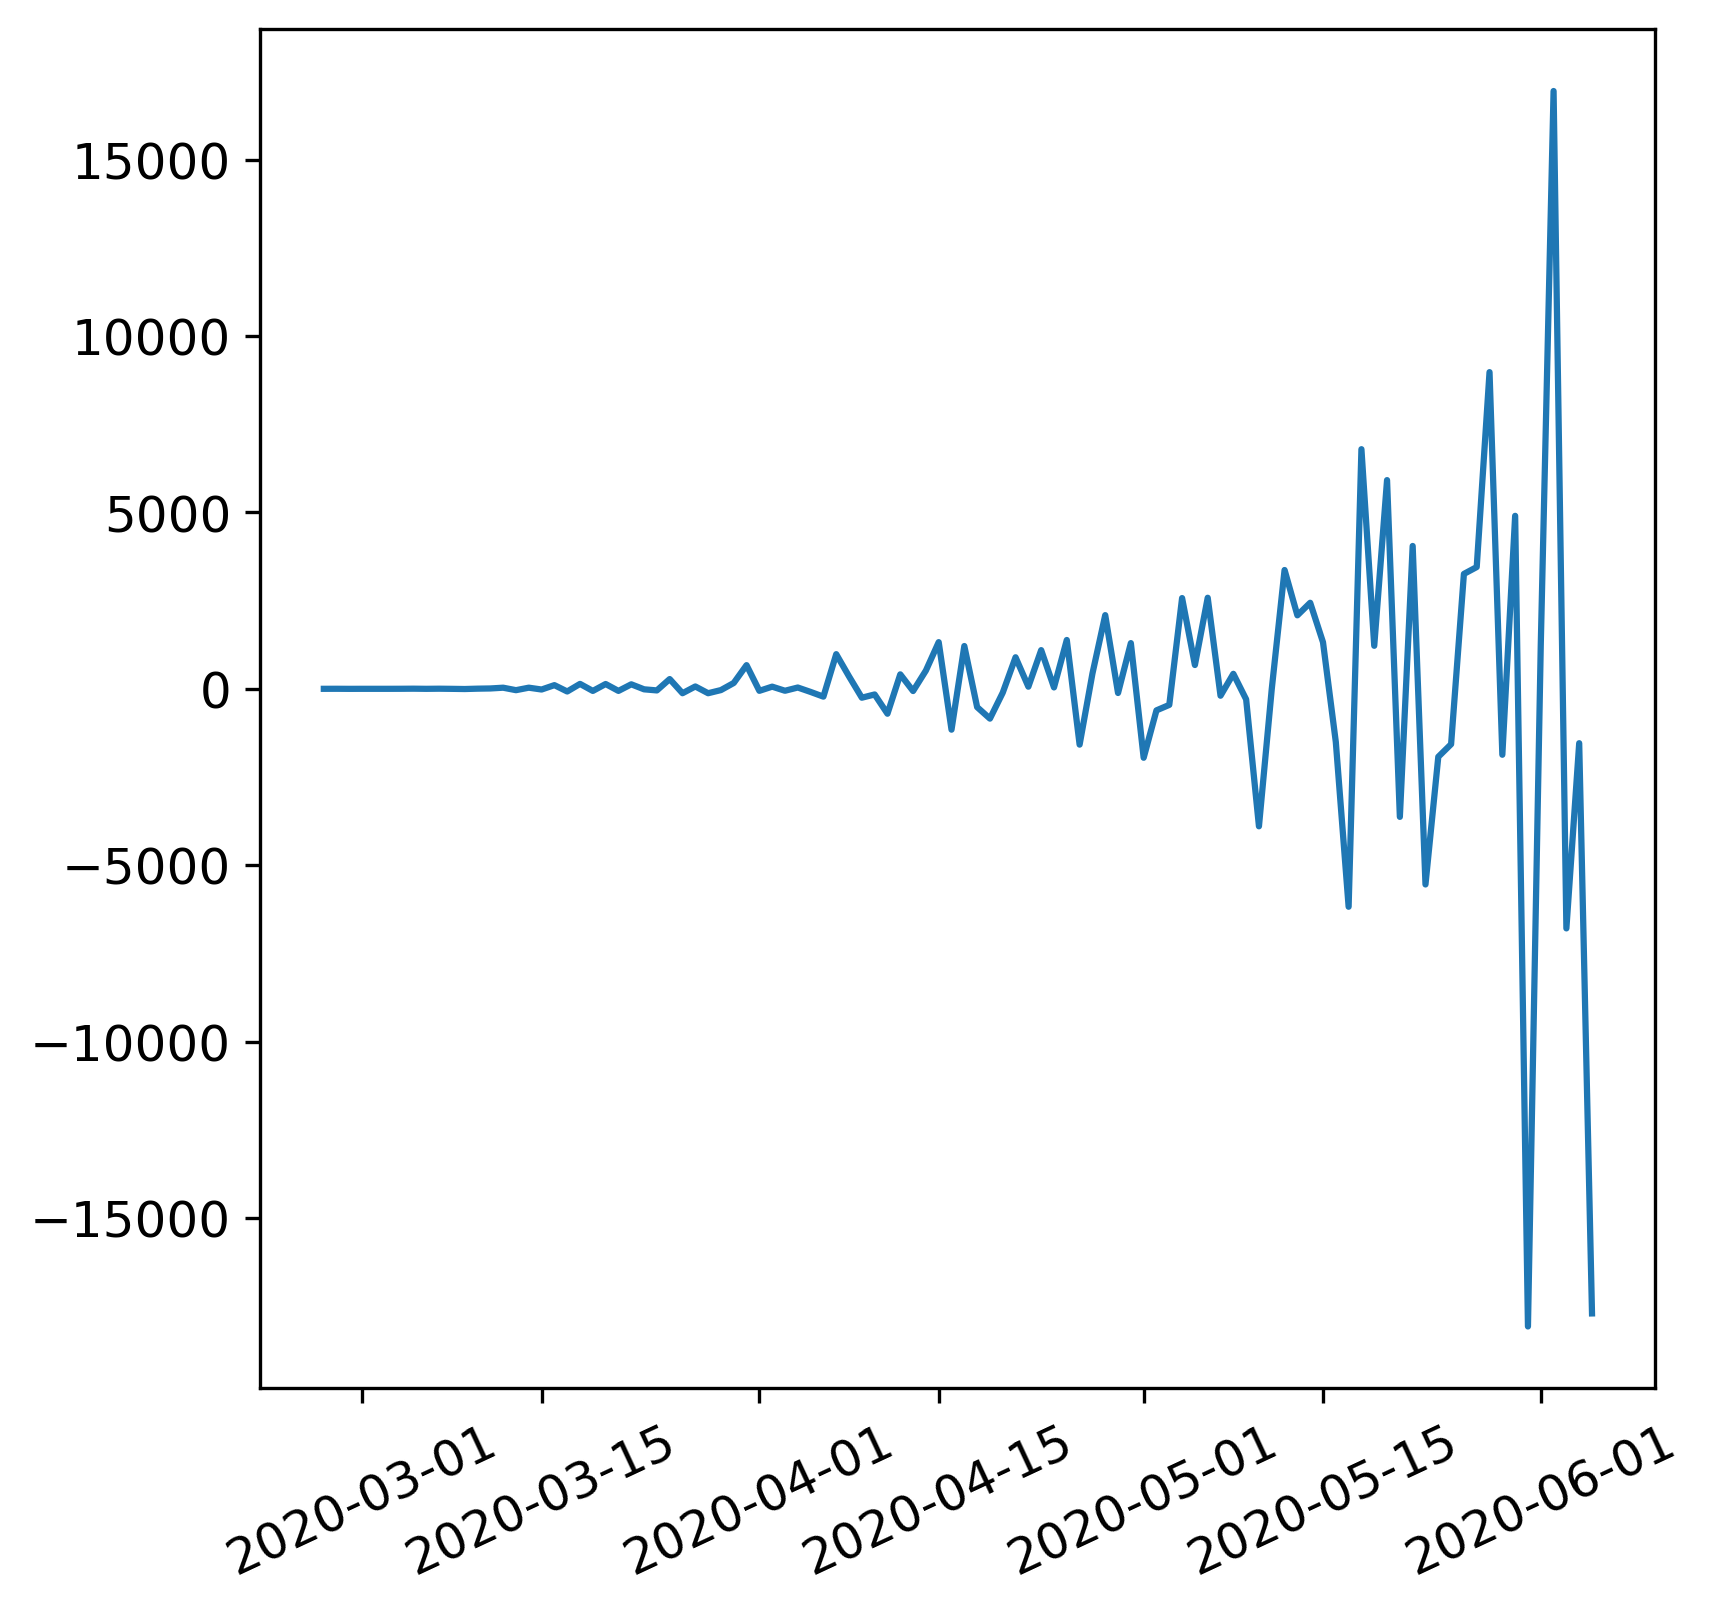

In [30]:
plt.figure(figsize=size_fig)
plt.plot(df.diff().diff().dropna())
plt.xticks(rotation=25)
# plt.ylabel(campo)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

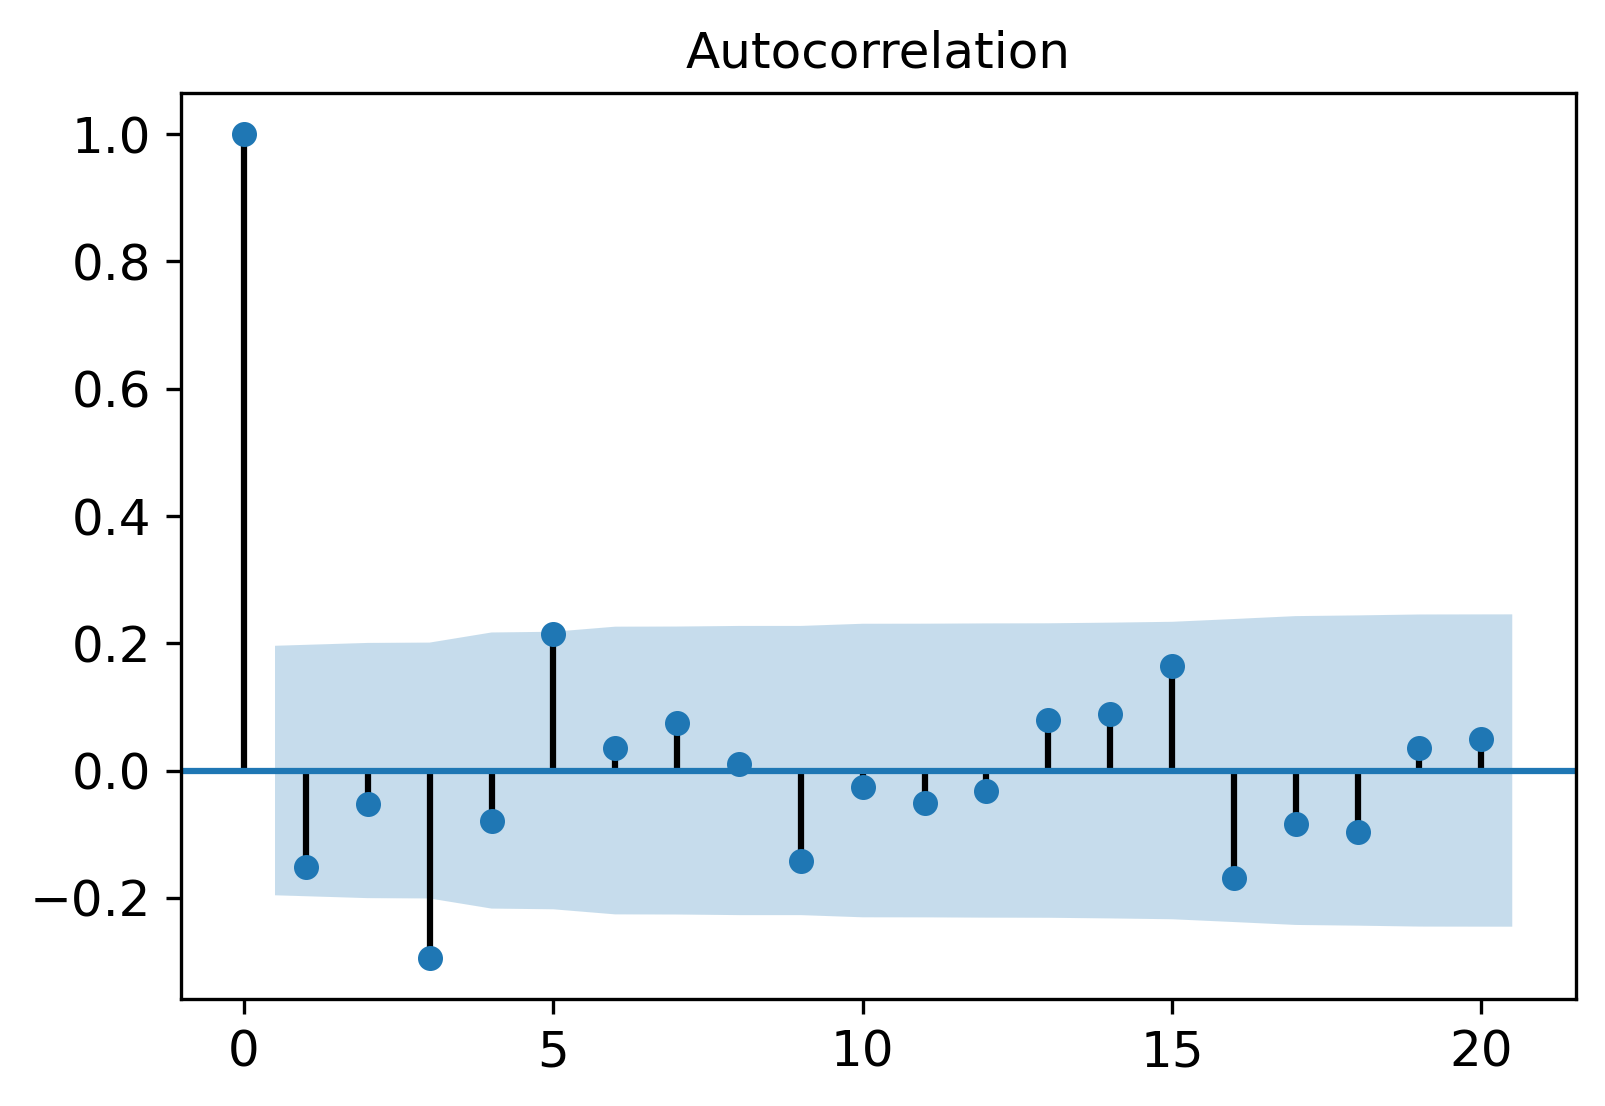

In [31]:
plt.figure(figsize=size_fig)
plot_acf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

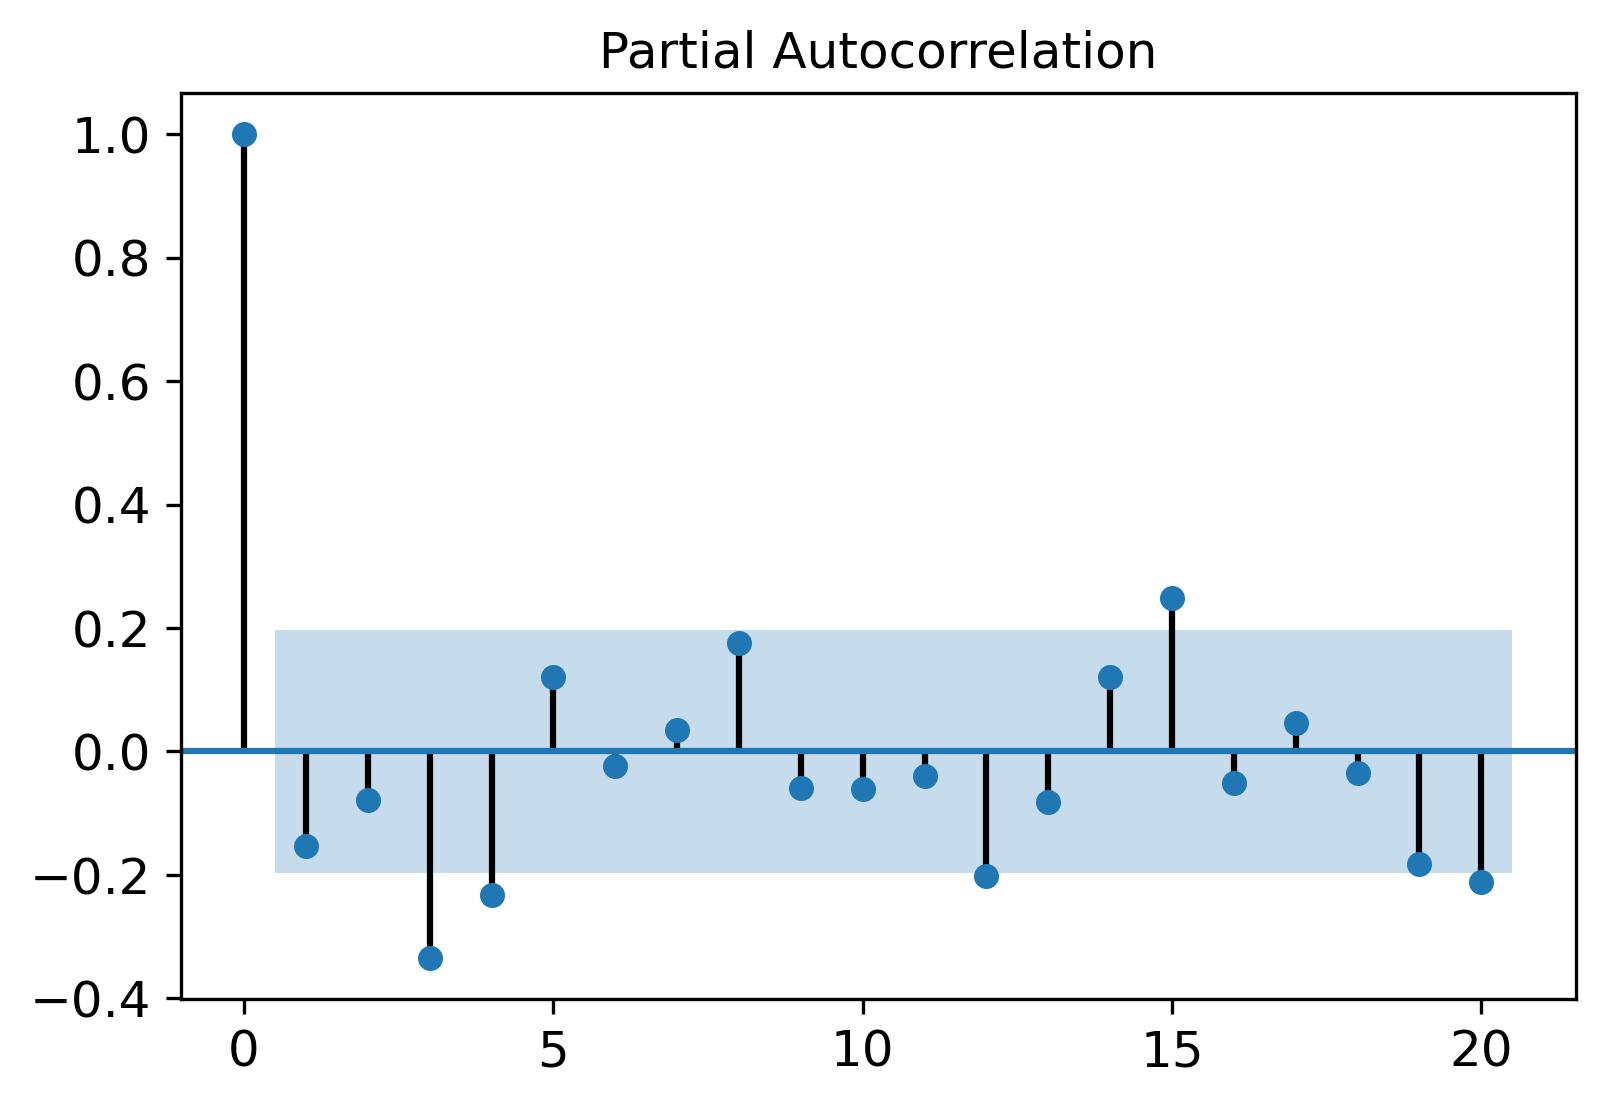

In [32]:
plt.figure(figsize=size_fig)
plot_pacf(df.diff().diff().dropna())
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

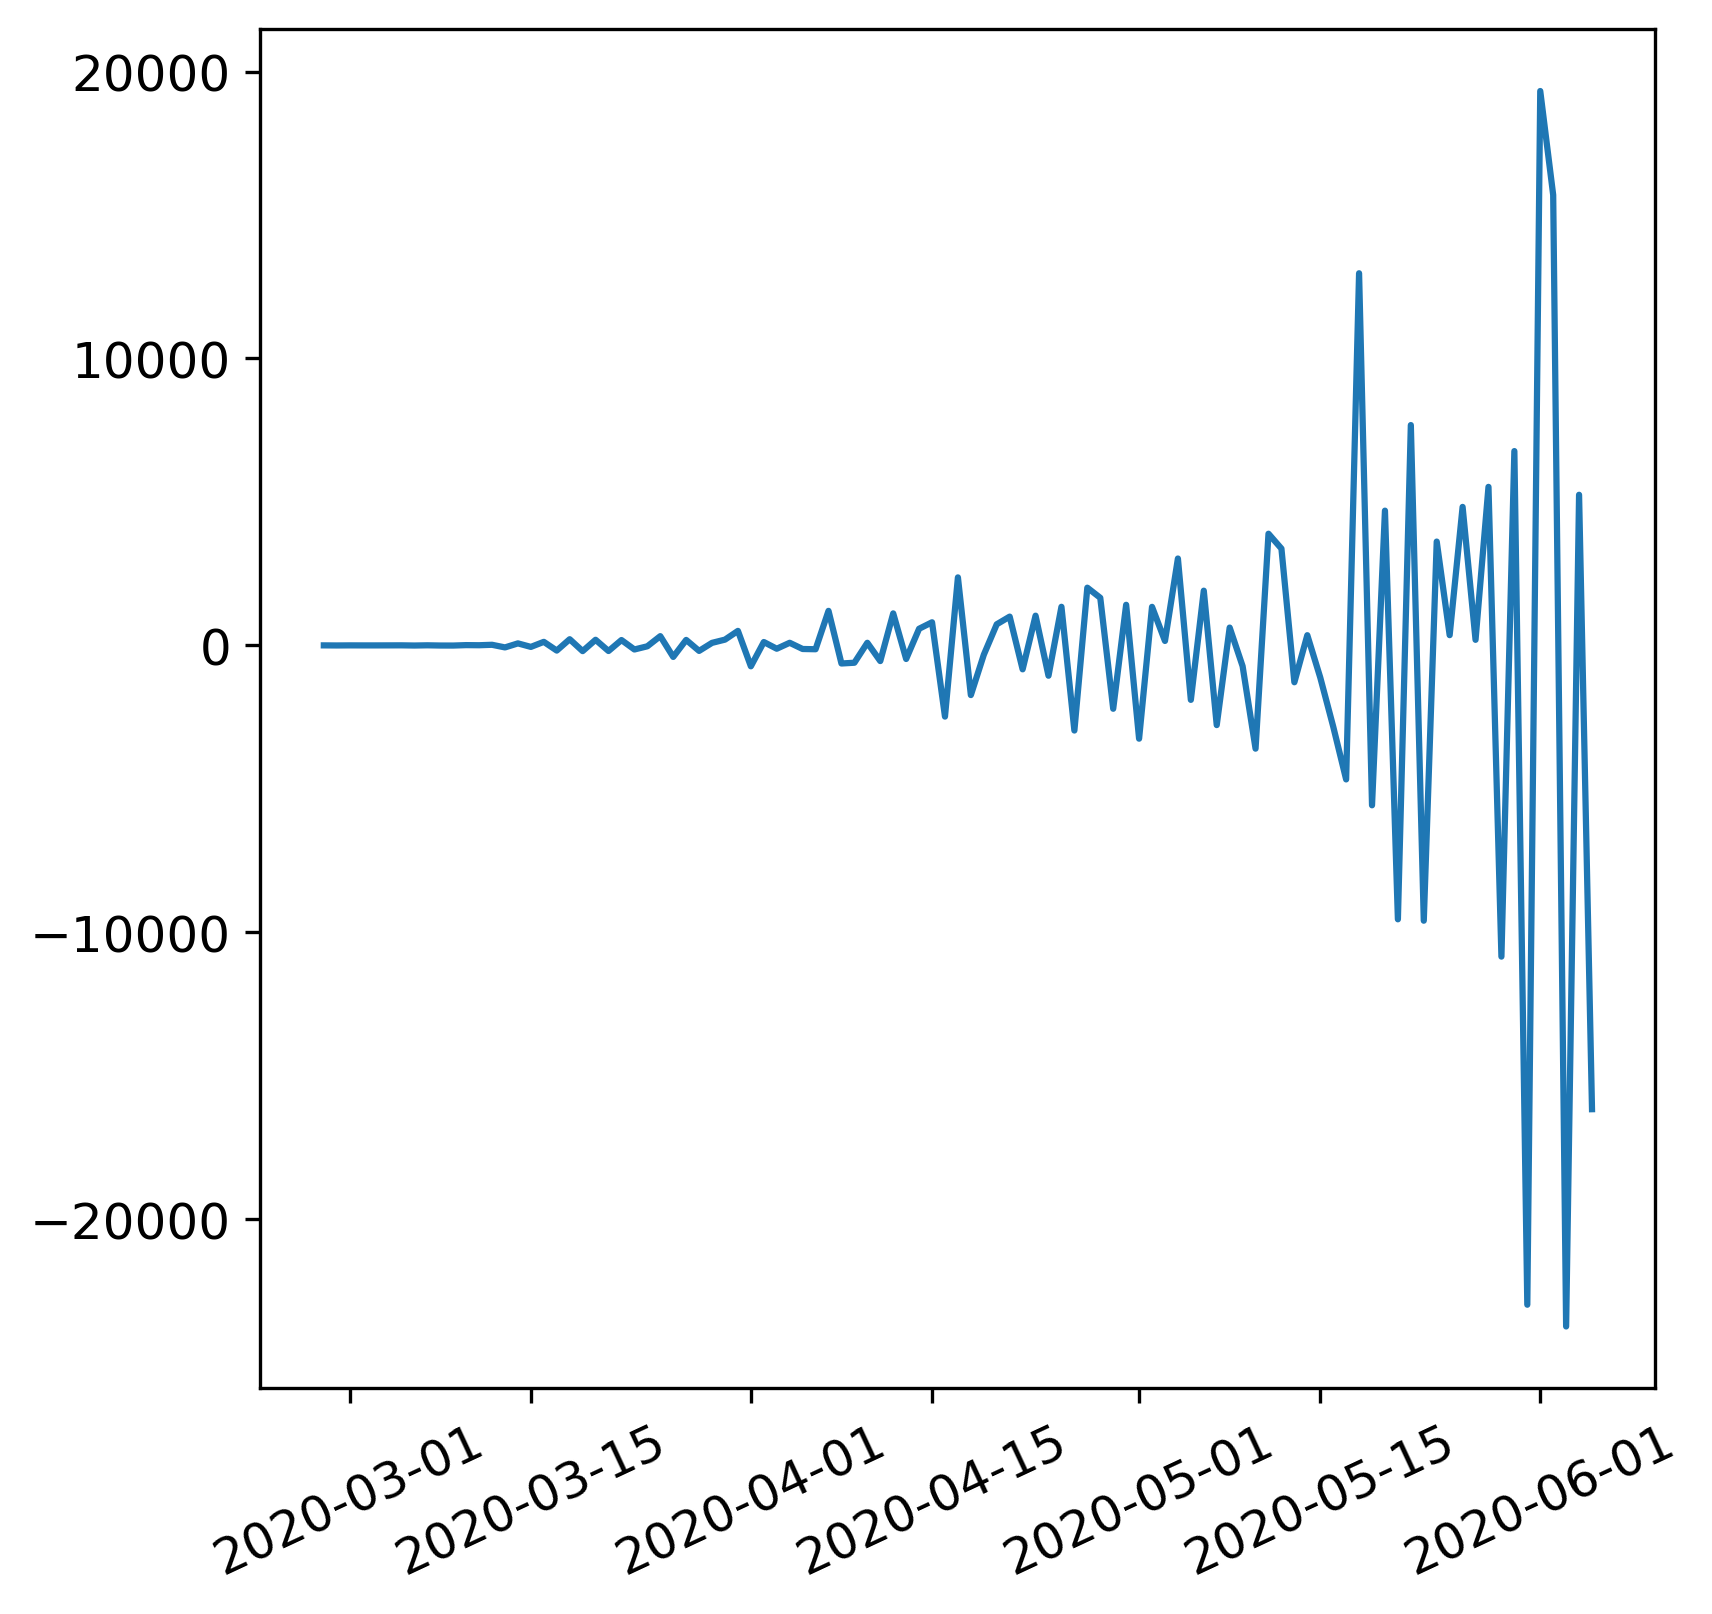

In [33]:
plt.figure(figsize=size_fig)
plt.plot(df.diff().diff().diff().dropna())
plt.xticks(rotation=25)
# plt.ylabel(campo)
if print_campo == 's':
    g += 1
#     plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

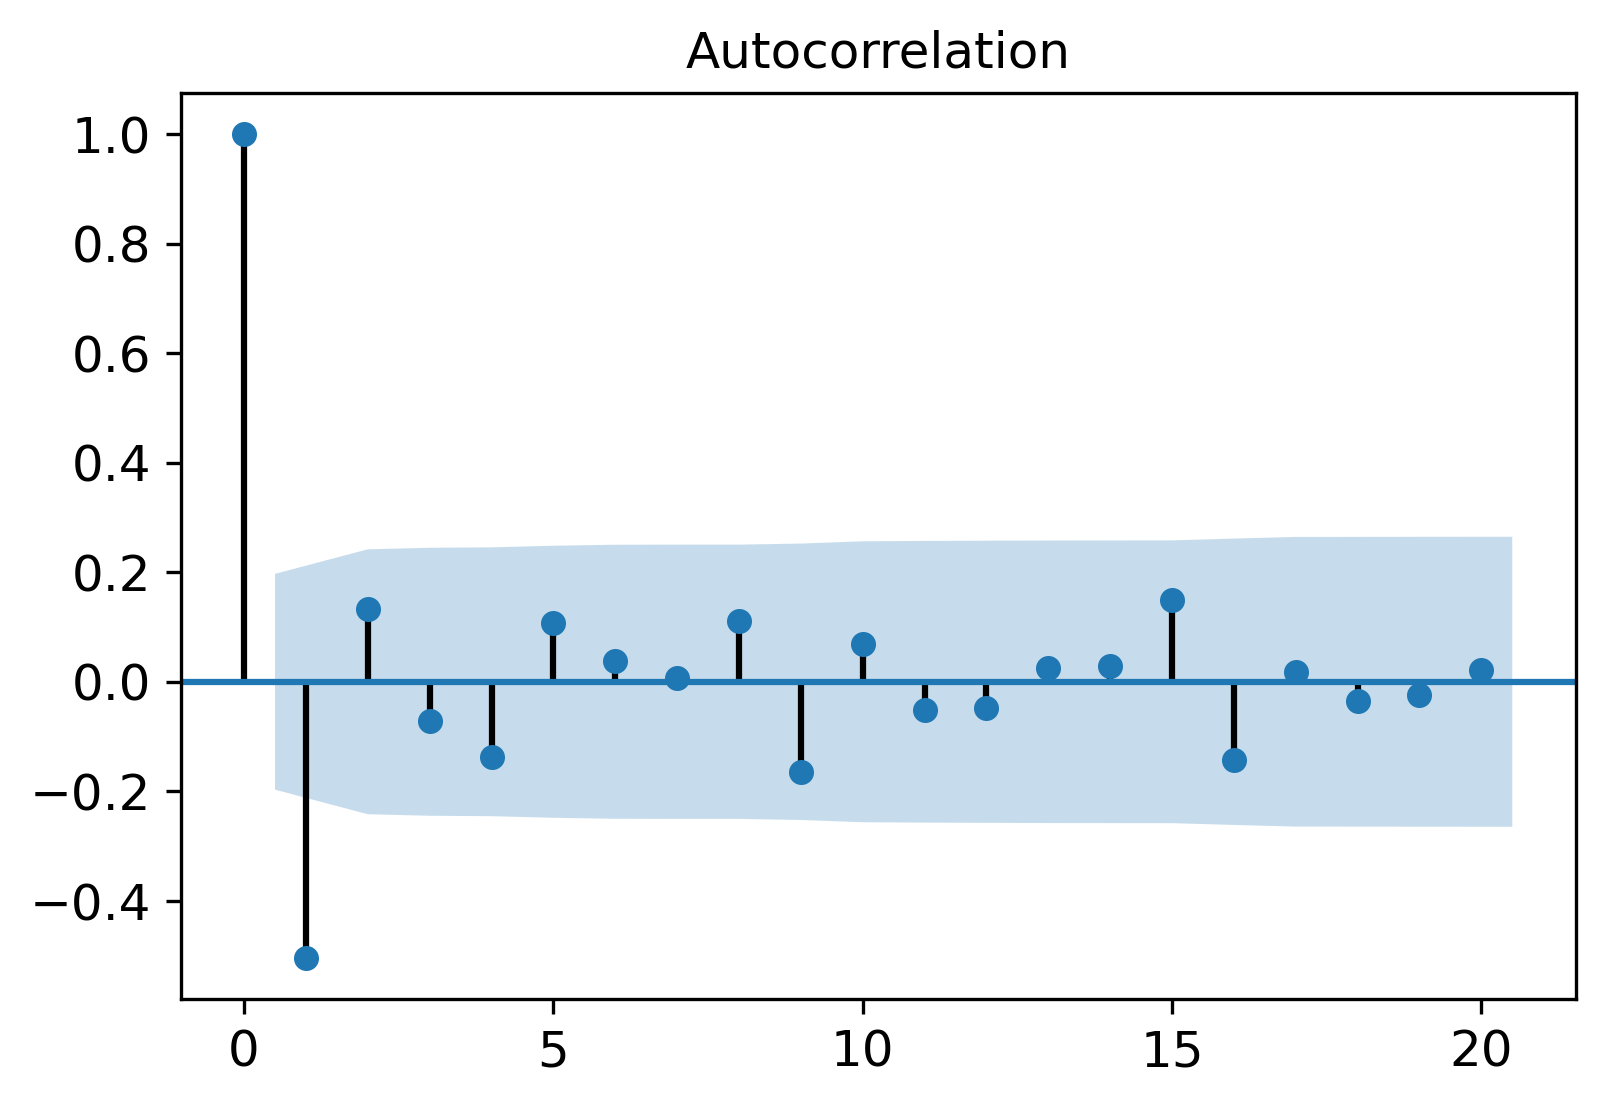

In [34]:
plt.figure(figsize=size_fig)
plot_acf(df.diff().diff().diff().dropna())
if print_campo == 's':
    g += 1
#     plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

<Figure size 1800x1800 with 0 Axes>

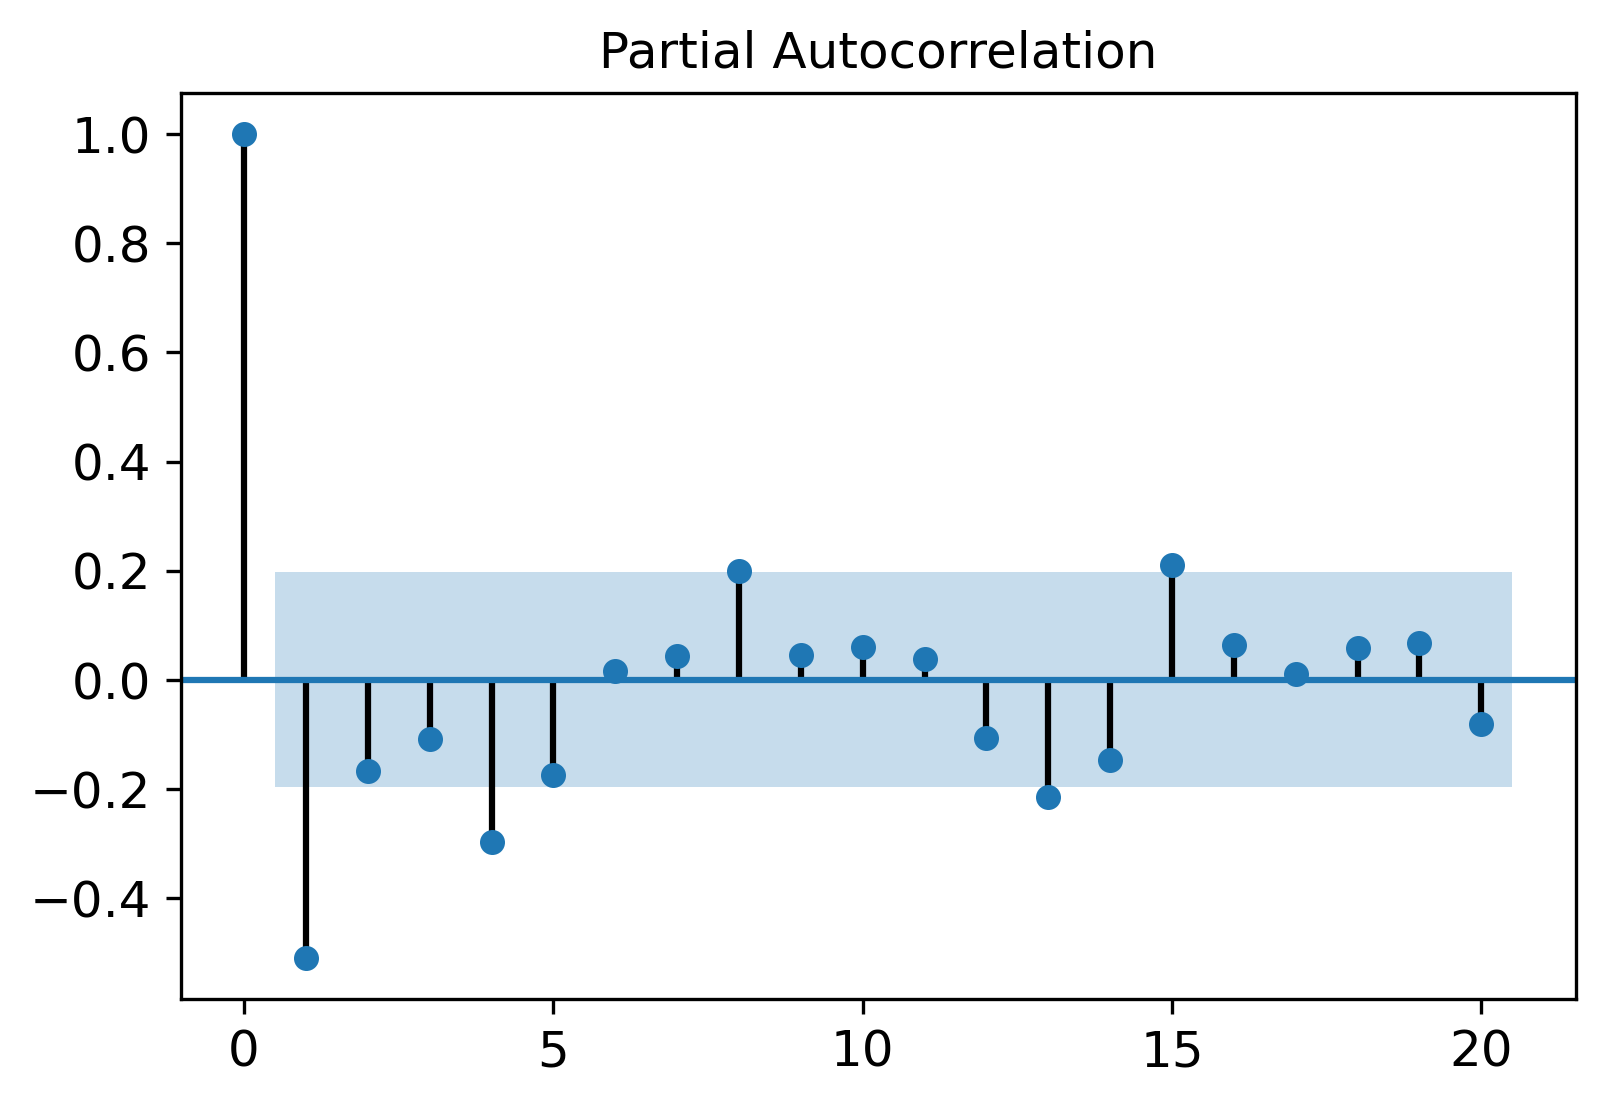

In [35]:
plt.figure(figsize=size_fig)
plot_pacf(df.diff().diff().diff().dropna())
if print_campo == 's':
    g += 1
#     plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [36]:
fonte = 20
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

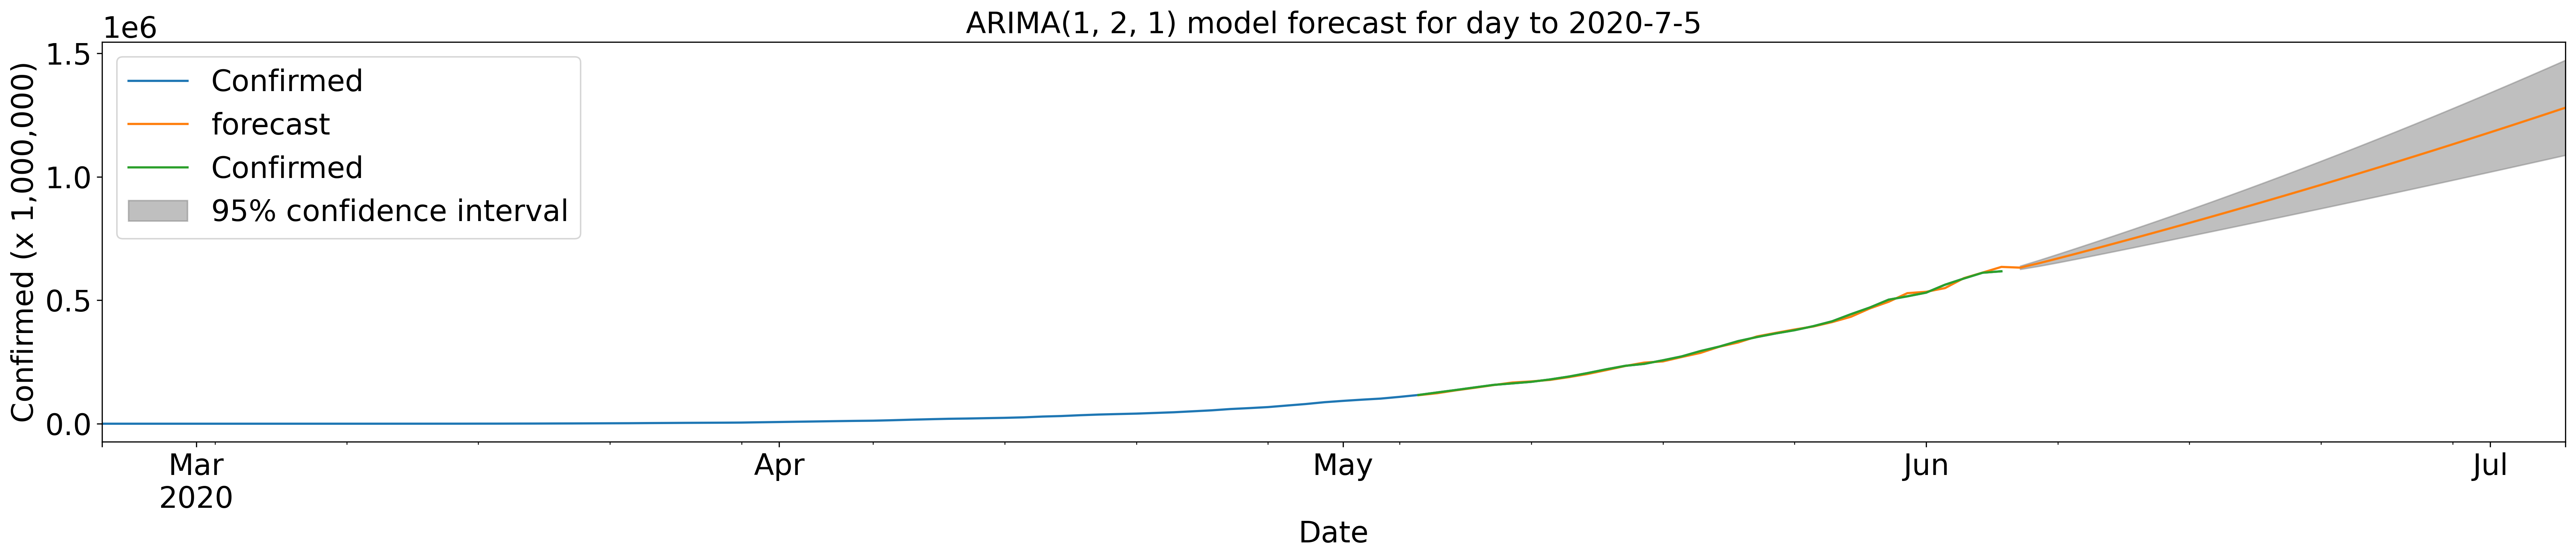

In [37]:
p = 1
d = 2
q = 1
test = (p,d,q) #paramentros guardados em uma variável
modelo = ARIMA(df[campo], order=test, freq='D') #parametros para o modelo preditivo
results = modelo.fit() #ajuste de modelo
plt.figure(figsize=figsize) #plotando imagem
results.plot_predict(
   first, last,               #plotando a primeira e ultima data?
    ax = df[campo].plot(), #filtrando e usando apenas a coluna 'confirmed'
    plot_insample=True,
)
plt.ylabel(campo + ' (x 1,000,000)')
plt.title('ARIMA'+str(test)+' model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.Confirmed   No. Observations:                  100
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -954.672
Method:                       css-mle   S.D. of innovations           3375.842
Date:                Sun, 07 Jun 2020   AIC                           1917.343
Time:                        11:02:19   BIC                           1927.764
Sample:                    02-27-2020   HQIC                          1921.561
                         - 06-05-2020                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                201.7288     86.290      2.338      0.019      32.603     370.854
ar.L1.D2.Confirmed     0.3501      0.141      2.492      0.013       0.075       0.626
ma.L1.D2.Confirmed    -0.8439      0.063    -13.434      0.000      -0.967      -0.721
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.8563           +0.0000j            2.8563            0.0000
MA.1            1.1850           +0.0000j            1.1850            0.0000
-----------------------------------------------------------------------------
"""

In [39]:
fonte = 5
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

In [40]:
pred = results.forecast(steps=30)
pred_mean = list(pred[0])
pred_min = list(pred[2][:,0])
pred_max = list(pred[2][:,1])
pred_data = pd.DataFrame()
pred_data['Predicted'] = pred_mean
pred_data['Max'] = pred_max
pred_data['Min'] = pred_min
pred_data.to_csv('pred_data.csv')
pred_data

,Predicted,Max,Min
0,6.322563e+05,6.388729e+05,6.256398e+05
1,6.502300e+05,6.621924e+05,6.382676e+05
2,6.694679e+05,6.865338e+05,6.524019e+05
3,6.892794e+05,7.113383e+05,6.672205e+05
4,7.094229e+05,7.364647e+05,6.823811e+05
5,7.298137e+05,7.618931e+05,6.977344e+05
6,7.504222e+05,7.876330e+05,7.132114e+05
7,7.712381e+05,8.136975e+05,7.287786e+05
8,7.922576e+05,8.400963e+05,7.444189e+05
9,8.134795e+05,8.668357e+05,7.601233e+05


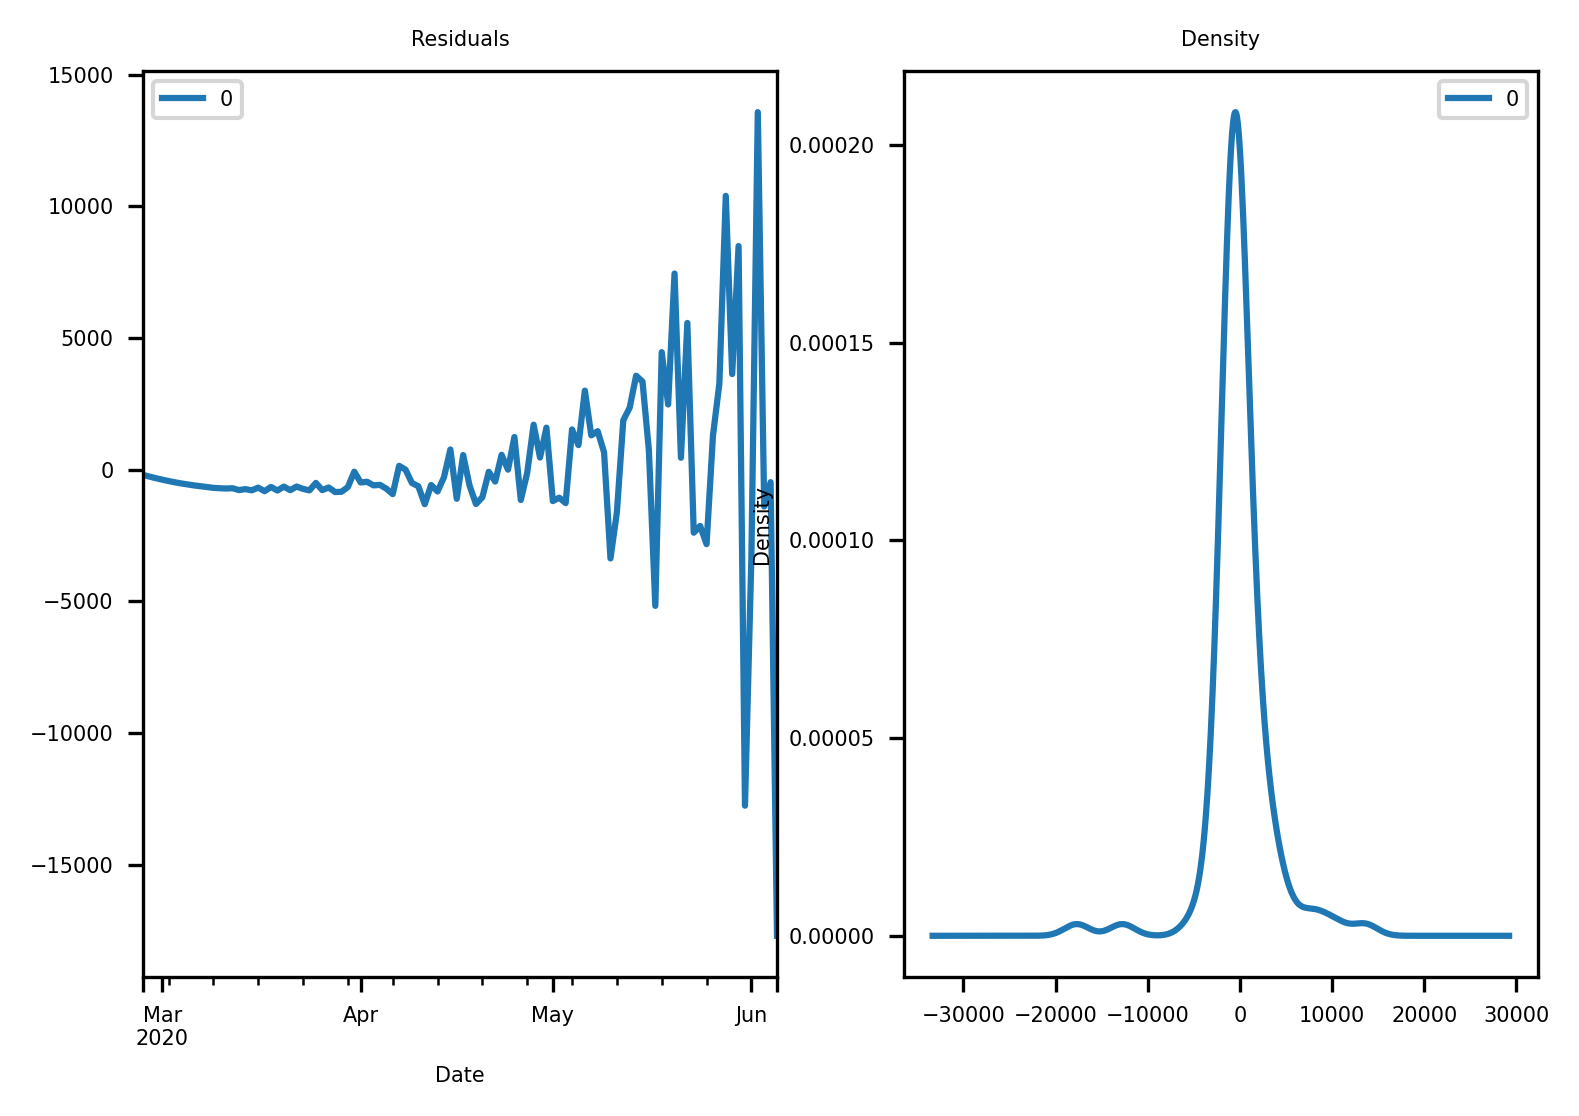

<Figure size 300x600 with 0 Axes>

In [41]:
residuals = pd.DataFrame(results.resid)
fig, ax = plt.subplots(1,2, )
plt.figure(figsize=(1,2))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
if print_campo == 's':
    g += 1
#     plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png', dpi=150)

In [42]:
fonte = 8
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)

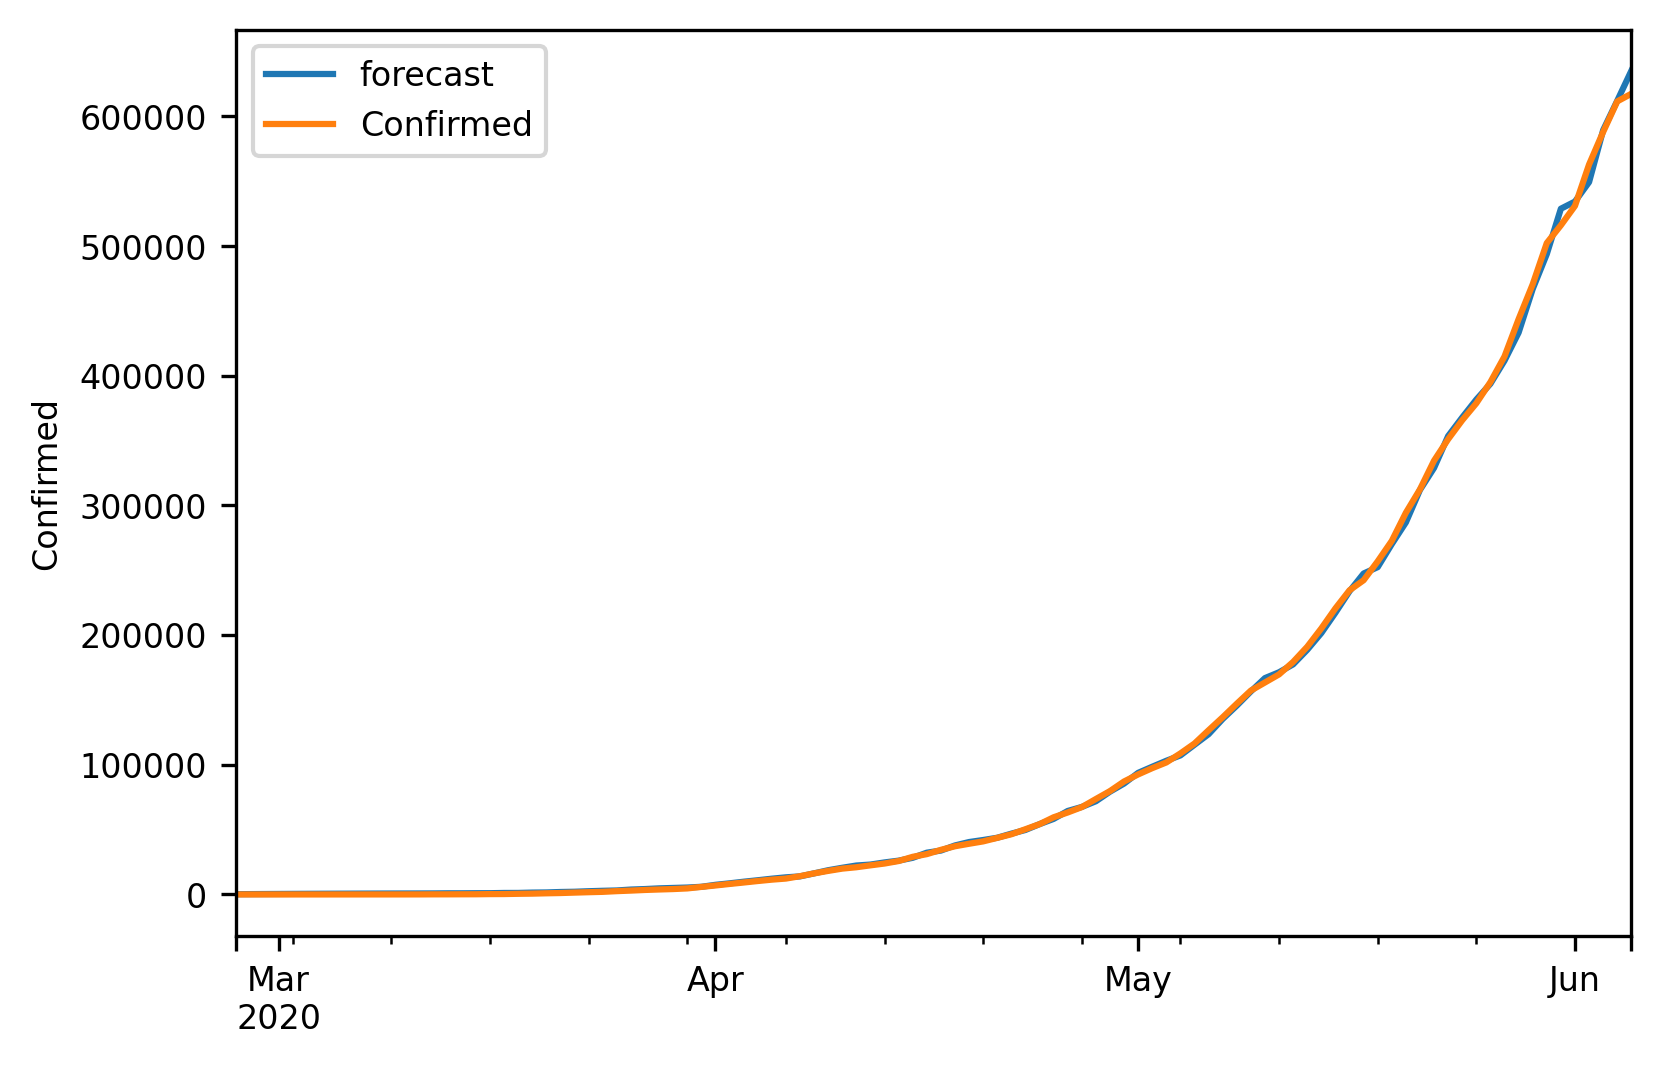

In [43]:
results.plot_predict(dynamic=False)
plt.ylabel(campo)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')

In [44]:
fc, se, conf = results.forecast(79, alpha=0.05)
fc

array([ 632256.34995456,  650230.02750003,  669467.86949542,
        689279.40691655,  709422.90140849,  729813.71857027,
        750422.22726692,  771238.05341708,  792257.56497751,
        813479.49034276,  834903.3843143 ,  856529.0910248 ,
        878356.55590394,  900385.75984624,  922616.69616274,
        945049.36251158,  967683.75807286,  990519.88255952,
       1013557.73587106, 1036797.31797231, 1060238.62885093,
       1083881.66850262, 1107726.43692586, 1131772.93412014,
       1156021.16008526, 1180471.11482115, 1205122.7983278 ,
       1229976.2106052 , 1255031.35165334, 1280288.22147223,
       1305746.82006186, 1331407.14742223, 1357269.20355335,
       1383332.9884552 , 1409598.50212781, 1436065.74457115,
       1462734.71578524, 1489605.41577007, 1516677.84452565,
       1543952.00205197, 1571427.88834903, 1599105.50341683,
       1626984.84725538, 1655065.91986467, 1683348.72124471,
       1711833.25139548, 1740519.510317  , 1769407.49800927,
       1798497.21447227,

In [45]:
# from statsmodels.tsa.stattools import acf

In [46]:
'''
model = pm.auto_arima(df, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
'''

"\nmodel = pm.auto_arima(df, start_p=0, start_q=0,\n                      test='adf',       # use adftest to find optimal 'd'\n                      max_p=3, max_q=3, # maximum p and q\n                      m=1,              # frequency of series\n                      d=None,           # let model determine 'd'\n                      seasonal=False,   # No Seasonality\n                      start_P=0, \n                      D=0, \n                      trace=True,\n                      error_action='ignore',  \n                      suppress_warnings=True, \n                      stepwise=True)\n\nprint(model.summary())\n"

In [47]:
'''
smodel = pm.auto_arima(df, start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, m=30,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()
'''

"\nsmodel = pm.auto_arima(df, start_p=0, start_q=0,\n                         test='adf',\n                         max_p=3, max_q=3, m=30,\n                         start_P=0, seasonal=True,\n                         d=None, D=1, trace=True,\n                         error_action='ignore',  \n                         suppress_warnings=True, \n                         stepwise=True)\n\nsmodel.summary()\n"

In [48]:
'''
sxmodel = pm.auto_arima(df, 
                           start_p=0, start_q=0,
                           test='adf',
                           max_p=3, max_q=3, m=30,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()
'''

"\nsxmodel = pm.auto_arima(df, \n                           start_p=0, start_q=0,\n                           test='adf',\n                           max_p=3, max_q=3, m=30,\n                           start_P=0, seasonal=True,\n                           d=None, D=1, trace=True,\n                           error_action='ignore',  \n                           suppress_warnings=True, \n                           stepwise=True)\n\nsxmodel.summary()\n"

In [49]:
'''
y = df[campo]
param_list_best=(1,2,1)
param_s_list_best=(0,1,0,30)
mod = sm.tsa.statespace.SARIMAX(
                                y,
                                order=param_list_best,
                                seasonal_order=param_s_list_best,
                                enforce_stationarity=False,
                                enforce_invertibility=False
)
results = mod.fit()
results.summary()
'''

'\ny = df[campo]\nparam_list_best=(1,2,1)\nparam_s_list_best=(0,1,0,30)\nmod = sm.tsa.statespace.SARIMAX(\n                                y,\n                                order=param_list_best,\n                                seasonal_order=param_s_list_best,\n                                enforce_stationarity=False,\n                                enforce_invertibility=False\n)\nresults = mod.fit()\nresults.summary()\n'

In [50]:
'''
fonte = 15
params = {
        'font.size': fonte,
        'legend.fontsize': fonte,
        'axes.labelsize': fonte,
        'axes.titlesize': fonte,
        'xtick.labelsize': fonte,
        'ytick.labelsize': fonte,
        'figure.dpi':300
}
plt.rcParams.update(params)
'''

"\nfonte = 15\nparams = {\n        'font.size': fonte,\n        'legend.fontsize': fonte,\n        'axes.labelsize': fonte,\n        'axes.titlesize': fonte,\n        'xtick.labelsize': fonte,\n        'ytick.labelsize': fonte,\n        'figure.dpi':300\n}\nplt.rcParams.update(params)\n"

In [51]:
'''
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='Observed', figsize=figsize)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel(campo + ' (x 1,000,000)')
upper = round(pred_uc.conf_int()['upper Confirmed'].tail(1).values[0], 2)
lower = round(pred_uc.conf_int()['lower Confirmed'].tail(1).values[0], 2)
plt.text(x='2020-02-26', y=lower-300000, s=
    'Upper: ' + str(round(upper/1000000, 2)) + ' M\n'+
    'Forecast: ' + str(round(((upper - lower)/2 + lower)/1000000, 2)) + ' M\n'+
    'Lower: ' + str(round(lower/1000000, 2)) + ' M'
)
plt.legend()
plt.title('SARIMA model forecast for day to ' + last)
if print_campo == 's':
    g += 1
    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')
'''

"\npred_uc = results.get_forecast(steps=30)\npred_ci = pred_uc.conf_int()\nax = y.plot(label='Observed', figsize=figsize)\npred_uc.predicted_mean.plot(ax=ax, label='Forecast')\nax.fill_between(pred_ci.index,\n                pred_ci.iloc[:, 0],\n                pred_ci.iloc[:, 1], color='k', alpha=.25)\nax.set_xlabel('Date')\nax.set_ylabel(campo + ' (x 1,000,000)')\nupper = round(pred_uc.conf_int()['upper Confirmed'].tail(1).values[0], 2)\nlower = round(pred_uc.conf_int()['lower Confirmed'].tail(1).values[0], 2)\nplt.text(x='2020-02-26', y=lower-300000, s=\n    'Upper: ' + str(round(upper/1000000, 2)) + ' M\n'+\n    'Forecast: ' + str(round(((upper - lower)/2 + lower)/1000000, 2)) + ' M\n'+\n    'Lower: ' + str(round(lower/1000000, 2)) + ' M'\n)\nplt.legend()\nplt.title('SARIMA model forecast for day to ' + last)\nif print_campo == 's':\n    g += 1\n    plt.savefig('ts\\0'+str(g)+'-'+campo+'_'+data+'.png')\n"